# About this project

Pada project ini, kita akan menggunakan dataset pinjaman untuk small business bersumber dari US Small Business Administration (SBA) untuk membangun model klasifikasi yang dapat memprediksi apakah suatu pinjaman akan default (gagal bayar) atau tidak berdasarkan faktor-faktor pada data yang tersedia. Tujuan utama proyek ini adalah untuk membantu lembaga keuangan dalam membuat decision yang lebih baik mengenai pemberian pinjaman.

Tujuan project:
- Membuat model prediksi yang dapat mengklasifikasikan pinjaman menjadi dua kategori, yaitu: CHGOFF (gagal bayar) atau P I F (paid in full / lunas)
- Memberikan rekomendasi bisnis berdasarkan hasil analisis, EDA, dan model yang dibangun.
- Mengidentifikasi faktor-faktor yang paling berpengaruh dalam memprediksi status pinjaman.

Dataset yang digunakan dalam proyek ini adalah SBAnational.csv, yang berisi informasi tentang pinjaman SBA dari tahun 1987 hingga 2014

Output:
- Hasil analisis EDA yang dilakukan
- Model prediksi yang dapat memprediksi seakurat mungkin apakah suatu pinjaman akan default atau lunas.
- Evaluasi kinerja model untuk setiap model yang dibangun
- Business recommendation & insight

# Penjelasan masing-masing kolom dataset

- LoanNr_ChkDgt: Kode nomor unique untuk setiap pinjaman. Kolom ini berguna sebagai identifier, namun di project ini tidak akan digunakan sebagai fitur dalam model karena sifatnya unique dan tidak membantu pembuatan model.

- Name: Nama peminjam. Ini juga bersifat unique dan tidak akan digunakan dalam pembuatan model.

- City: Kota asal peminjam.

- State: Negara bagian peminjam.

- Zip: Kode pos peminjam.

- Bank: Nama bank dalam melakukan pinjaman.

- BankState: Negara bagian bank dalam melakukan pinjaman.

- NAICS: The North American Industry Classification System. Kode sistem untuk mengklasifikasi Industri Amerika.

- ApprovalDate: Tanggal persetujuan pinjaman diberikan.

- ApprovalFY: Tahun fiskal persetujuan pinjaman diberikan.

- Term: Jangka waktu pinjaman (dalam satuan bulan).

- NoEmp: Jumlah karyawan di bisnis peminjam.

- NewExist: Indikator apakah bisnis peminjam adalah baru atau sudah ada (1 = Existing business, 2 = New business).

- CreateJob: Jumlah pekerjaan yang diciptakan. Ini bisa menjadi indikator dampak sosial dari pinjaman.

- RetainedJob: Jumlah pekerjaan yang dipertahankan. Maksudnya adalah jumlah pekerjaan sejak awal bisnis dibangun sampai sekarang.

- FranchiseCode: Kode franchise

- UrbanRural: Indikator apakah bisnis berada di daerah urban atau rural. Bisa digunakan untuk analisis geografis.

- RevLineCr: Indikator apakah pinjaman ini adalah kredit bergulir atau tidak. Kredit bergulir maksudnya adalah sistem penarikan dana sesuai dengan kebutuhan debitur kapanpun, asalkan tidak lebih dari limit.

- LowDoc: Indikator apakah pinjaman diproses melalui program LowDoc. LowDoc adalah jenis program pinjaman dimana peminjam tidak melampirkan "proof of income" dan detail bukti jaminan pinjaman lainnya. Biasanya low doc loan ditargetkan untuk orang-orang self employed yang tidak memiliki gaji karena statusnya yang self employed. (Source: https://www.mortgagechoice.com.au/home-loans/loan-types/low-doc-loan/)

- ChgOffDate: Tanggal pinjaman dinyatakan gagal bayar.

- DisbursementDate: Tanggal pencairan pinjaman. Jika ApprovalDate adalah tanggal pinjaman diapprove, DisbursementDate adalah tanggal pencairan pinjaman tersebut ke rekening bank peminjam.

- DisbursementGross: Jumlah pinjaman yang dicairkan.

- BalanceGross: Jumlah outstanding pinjaman. jumlah total uang yang masih harus dibayar kembali pada pinjaman tersebut

- MIS_Status: Status pinjaman (charged off atau paid in full). Ini adalah variabel target untuk model klasifikasi ini.

- ChgOffPrinGr: Jumlah pokok yang gagal bayar.

- GrAppv: Jumlah pinjaman yang disetujui oleh bank.

- SBA_Appv: Jumlah yang dijamin oleh SBA.



# Libraries

In [1]:
!pip install uszipcode
!pip install 'sqlalchemy_mate>=1.4.28.3,<2.0.0.0'

!pip install scikit-plot
!pip install optuna
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 6.3 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6941 sha256=36efd5afce3450a32c2240ac0cc6d77f3db8a1b82235cb443b34dd46df7acfa8
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.7 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.30
    Uninstalling SQLAlchemy-2.0.30:
      Successfully uninstalled SQLAlchemy-2.0.30
  Attempting uninstall: sqlalchemy_mate
    Found existing installation: sqlalchemy_mate 2.0.0.3
    Uninstalling sqlalchemy_mate-2.0.0.3:
      Successfully uninsta

In [2]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import uszipcode
from uszipcode import SearchEngine

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

import scikitplot as skplt
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

import optuna
import dalex as dx

import joblib

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Data check

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Dibimbing/DS 24_AryaWiratmaji_Progress Final Project (Drive)/Dataset/SBAnational.zip', 'r')
zip_ref.extractall('content/dataset')
zip_ref.close()

In [5]:
file_path = '/content/content/dataset/SBAnational.csv'
df = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)

<ipython-input-5-7e72fbfed50c>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [6]:
#file_path = '/content/drive/MyDrive/Dibimbing/DS 24_AryaWiratmaji_Progress Final Project (Drive)/Dataset/SBAnational.csv'
#df = pd.read_csv(file_path)
#df = df.sample(n=500000, random_state=42)
#pd.set_option('display.max_columns', None)

In [7]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [9]:
# Cek apakah benar LoanNr_ChkDgt berisi unique loan ID
df[df['LoanNr_ChkDgt'].duplicated() == True]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv


Observations:
1. Terdapat missing values pada kolom: `City`, `Bank`, `BankState`, `NewExist`, `RevLineCr`, `LowDoc`, `ChgOffDate`, `DisbursementDate`, `MIS_Status`.

Notes: `ChgOffDate` tidak ada input / na / missing value jika `MIS_Status`nya = `CHGOFF`. Jadi tidak perlu handling.

2. `LoanNr_ChkDgt` berisi unique values dan merepresentasikan ID dari setiap pengajuan loan. Kolom ini tidak akan berguna untuk modeling kita, dan akan didrop.
3. `ApprovalDate`, `ChgOffDate`, `DisbursementDate` perlu diubah tipe datanya agar sesuai dengan jenis data yang seharusnya, yaitu Datetime.
4. `DisbursementGross`, `BalanceGross`, `ChgOffPrinGr`, `GrAppv`, `SBA_Appv` perlu diubah tipe datanya agar sesuai dengan jenis data yang seharusnya, yaitu Datetime.

Notes: Harus remove simbol '$' juga

# Split to prevent leakage on preprocessing

### Isi `MIS_Status` dengan ketersediaan data `ChgOffDate`

In [10]:
# Yang value `ChgOffDate` ada tapi `MIS_Status` tidak ada
df[(df['ChgOffDate'].isna() == False) & (df['MIS_Status'].isna())].shape[0]

261

In [11]:
# Yang value `ChgOffDate` tidak ada dan `MIS_Status` tidak ada
df[(df['ChgOffDate'].isna()) & (df['MIS_Status'].isna())].shape[0]

1736

In [12]:
df['MIS_Status'].value_counts()

MIS_Status
P I F     739609
CHGOFF    157558
Name: count, dtype: int64

In [13]:
df['MIS_Status'] = np.where(df['ChgOffDate'].isna(), 'P I F', 'CHGOFF')

In [14]:
df['MIS_Status'].isna().sum()

0

## Split

In [15]:
X = df.drop(columns=['MIS_Status'])
y = df['MIS_Status']

train_indices, test_indices = train_test_split(df.index, test_size=0.3, random_state=42, stratify=y)
df_train = df.loc[train_indices]
df_test = df.loc[test_indices]

print("Training set size:", df_train.shape)
print("Test set size:", df_test.shape)

Training set size: (629414, 27)
Test set size: (269750, 27)


# Missing values handling

### Train dataframe

In [16]:
missing_val = df_train.isna().sum()
missing_val = missing_val[missing_val > 0]
print (missing_val)

Name                     7
City                    20
State                    8
Bank                  1120
BankState             1125
NewExist                91
RevLineCr             3145
LowDoc                1802
ChgOffDate          515525
DisbursementDate      1673
dtype: int64


In [17]:
missing_pct = df_train.isnull().sum() * 100 / len(df)
missing_df = pd.DataFrame({'Missing value percentage': missing_pct})
missing_df = missing_df[missing_df['Missing value percentage'] > 0]
print(missing_df)

                  Missing value percentage
Name                              0.000779
City                              0.002224
State                             0.000890
Bank                              0.124560
BankState                         0.125116
NewExist                          0.010121
RevLineCr                         0.349769
LowDoc                            0.200408
ChgOffDate                       57.333812
DisbursementDate                  0.186062


**HANDLING `City` & `State` IMPUTATION**

Pertama, kita fokus untuk menghandle missing value `City` & `State` dulu. Untuk menentukan `City` & `State`, sebetulnya kita bisa mengkorelasikan dengan `Zip` code. Kita cek apakah row data yang missing value itu memiliki nilai `Zip`.

In [18]:
df_train[(df_train['City'].isnull()) & (df_train['Zip'].isnull() == False)]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
270263,2884182004,"HERMANOS LOPEZ,INC. ""B""",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,16-Apr-81,1981,180,45,2.0,0,0,0,0,N,N,NaN,6-Jan-82,"$488,000.00",$0.00,P I F,$0.00,"$488,000.00","$488,000.00"
270270,2884212000,"EMACO, INC. ""B""",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,13-Jul-81,1981,180,7,2.0,0,0,0,0,N,N,NaN,10-Sep-81,"$105,000.00",$0.00,P I F,$0.00,"$105,000.00","$105,000.00"
243452,2716832010,"ACE PLATING COMPANY,INC.",NaN,IL,60636,NaN,NaN,0,15-May-81,1981,180,1,2.0,0,0,0,0,N,N,NaN,4-Nov-81,"$49,000.00",$0.00,P I F,$0.00,"$49,000.00","$49,000.00"
350109,3438122002,DULTMEIER SALES,NaN,NE,50309,IOWA BUSINESS GROWTH COMPANY,IA,0,7-Oct-81,1982,180,10,2.0,0,0,0,0,N,N,NaN,6-Jan-82,"$225,000.00",$0.00,P I F,$0.00,"$225,000.00","$225,000.00"
342928,3391402005,MASTER PLEATING COMPANY,NaN,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,21-Jul-81,1981,180,65,1.0,0,0,0,0,N,N,NaN,4-Nov-81,"$83,000.00",$0.00,P I F,$0.00,"$83,000.00","$83,000.00"
437804,4247612009,DOUBLE W MOLD INC,NaN,MA,2401,NaN,NaN,0,3-Aug-81,1981,180,21,1.0,0,0,0,0,N,N,NaN,4-Nov-81,"$38,000.00",$0.00,P I F,$0.00,"$38,000.00","$38,000.00"
342946,3391472004,CLARK TIRE COMPANY,NaN,MO,63105,BUSINESS FINAN CORP OF ST. LOU,MO,0,4-Mar-81,1981,240,17,1.0,0,0,0,0,N,N,NaN,10-Jun-81,"$111,000.00",$0.00,P I F,$0.00,"$111,000.00","$111,000.00"
564191,5554512008,"ACTION GRAPHICS, INC.",NaN,KY,40209,CAPITAL ACCESS CORP - KENTUCKY,KY,0,16-Jun-81,1981,300,14,1.0,0,0,0,0,N,N,NaN,5-Aug-81,"$87,000.00",$0.00,P I F,$0.00,"$87,000.00","$87,000.00"
410933,3970882003,"DOVER GRAPHICS,INC.",NaN,MO,64106,EDC LOAN CORPORATION,MO,0,12-Mar-81,1981,240,12,1.0,0,0,0,0,N,N,NaN,1-Jun-81,"$50,000.00",$0.00,P I F,$0.00,"$52,000.00","$52,000.00"
570342,5622822010,HMC PROPERTIES,NaN,NC,28402,WILMINGTON BUS. DEVEL,NC,0,13-Jul-81,1981,240,37,1.0,0,0,0,0,N,N,NaN,4-Nov-81,"$47,000.00",$0.00,P I F,$0.00,"$47,000.00","$47,000.00"


In [19]:
df_train[(df_train['State'].isnull()) & (df_train['Zip'].isnull() == False)]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
351072,3445553007,JAMES A. NICHOLS,"1542,TABUK,SAUDI ARABIA",NaN,79925,WELLS FARGO BANK NATL ASSOC,TX,532230,19-May-89,1989,16,1,2.0,0,0,0,0,N,N,NaN,31-Jul-89,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$54,000.00"
49244,1380800010,TRYON COATS & LEATHER,JOHNSTOWN NY,NaN,0,KEYBANK NATIONAL ASSOCIATION,NY,0,18-May-66,1966,282,0,0.0,0,0,0,0,N,N,29-Mar-90,16-Aug-66,"$60,000.00",$0.00,CHGOFF,"$6,084.00","$60,000.00","$54,000.00"
367007,3563473008,P & P TOOL INC,SOMERSET,NaN,54025,FIRST BANK OF BALDWIN,WI,0,26-Oct-89,1990,240,7,1.0,0,0,1,0,N,N,NaN,31-Jan-90,"$82,000.00",$0.00,P I F,$0.00,"$82,000.00","$73,800.00"
366139,3556993002,"GOLF SHOES UNLIMITED, INC.",PALM BEACH GARDENS,NaN,33410,"BEAL BANK, SSB",TX,451110,19-Oct-89,1990,84,3,2.0,0,0,1,0,N,N,NaN,31-Jan-90,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$67,500.00"
885335,9690723000,"VERANDA INTERIORS, INC.",A452638533,NaN,76645,PROSPERITY BANK,TX,0,24-Oct-96,1997,120,3,1.0,0,0,1,0,N,N,NaN,31-Jan-97,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$80,000.00"
35517,1270833006,SO. JERSEY DANCE/MERRYLEES,PENNSVILLE,NaN,8070,NaN,NaN,0,28-Jul-81,1981,120,1,2.0,0,0,0,0,N,N,5-Mar-90,NaN,$0.00,$0.00,CHGOFF,"$11,364.00","$15,000.00","$15,000.00"
306274,3113583009,THE COMPUTER EDGE,"BOX 267, APO AP",NaN,96205,RTC/WESTPORT SAVINGS BANK,CA,541511,21-Jan-88,1988,73,8,1.0,0,0,0,0,N,N,18-Sep-93,16-Mar-88,"$50,000.00",$0.00,CHGOFF,"$30,589.00","$50,000.00","$45,000.00"
869948,9390913007,"OLSON ELECTRIC SERVICE, INC.",A452638533,NaN,75236,PROSPERITY BANK,TX,235310,9-Jul-96,1996,60,17,1.0,0,0,1,0,N,Y,NaN,31-Jul-96,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"


**Observations:**

Ternyata, row data dari `City` & `State` yang missing memiliki `Zip` code. Sehingga kita bisa melakukan imputasi `City` & `State` berdasarkan `Zip` menggunakan package `uszipcode`. Package `uszipcode` akan mencari kode dari `Zip` code dan memberikan output kotanya. Output tersebut akan kita imputasi ke kolom `City` & `State`

In [20]:
search = SearchEngine()

imputed_rows = []

filter = df_train[(df_train['City'].isnull()) | (df_train['State'].isnull())]

for i in filter.index:
  zipcode = search.by_zipcode(df_train.loc[i, 'Zip'])
  if zipcode:
    df_train.loc[i, 'City'] = zipcode.major_city
    df_train.loc[i, 'State'] = zipcode.state
    imputed_rows.append(i)

df_train.loc[imputed_rows]

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
270263,2884182004,"HERMANOS LOPEZ,INC. ""B""",San Diego,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,16-Apr-81,1981,180,45,2.0,0,0,0,0,N,N,NaN,6-Jan-82,"$488,000.00",$0.00,P I F,$0.00,"$488,000.00","$488,000.00"
270270,2884212000,"EMACO, INC. ""B""",San Diego,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,13-Jul-81,1981,180,7,2.0,0,0,0,0,N,N,NaN,10-Sep-81,"$105,000.00",$0.00,P I F,$0.00,"$105,000.00","$105,000.00"
243452,2716832010,"ACE PLATING COMPANY,INC.",Chicago,IL,60636,NaN,NaN,0,15-May-81,1981,180,1,2.0,0,0,0,0,N,N,NaN,4-Nov-81,"$49,000.00",$0.00,P I F,$0.00,"$49,000.00","$49,000.00"
350109,3438122002,DULTMEIER SALES,Des Moines,IA,50309,IOWA BUSINESS GROWTH COMPANY,IA,0,7-Oct-81,1982,180,10,2.0,0,0,0,0,N,N,NaN,6-Jan-82,"$225,000.00",$0.00,P I F,$0.00,"$225,000.00","$225,000.00"
342928,3391402005,MASTER PLEATING COMPANY,Saint Louis,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,21-Jul-81,1981,180,65,1.0,0,0,0,0,N,N,NaN,4-Nov-81,"$83,000.00",$0.00,P I F,$0.00,"$83,000.00","$83,000.00"
342946,3391472004,CLARK TIRE COMPANY,Saint Louis,MO,63105,BUSINESS FINAN CORP OF ST. LOU,MO,0,4-Mar-81,1981,240,17,1.0,0,0,0,0,N,N,NaN,10-Jun-81,"$111,000.00",$0.00,P I F,$0.00,"$111,000.00","$111,000.00"
351072,3445553007,JAMES A. NICHOLS,El Paso,TX,79925,WELLS FARGO BANK NATL ASSOC,TX,532230,19-May-89,1989,16,1,2.0,0,0,0,0,N,N,NaN,31-Jul-89,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$54,000.00"
564191,5554512008,"ACTION GRAPHICS, INC.",Louisville,KY,40209,CAPITAL ACCESS CORP - KENTUCKY,KY,0,16-Jun-81,1981,300,14,1.0,0,0,0,0,N,N,NaN,5-Aug-81,"$87,000.00",$0.00,P I F,$0.00,"$87,000.00","$87,000.00"
367007,3563473008,P & P TOOL INC,Somerset,WI,54025,FIRST BANK OF BALDWIN,WI,0,26-Oct-89,1990,240,7,1.0,0,0,1,0,N,N,NaN,31-Jan-90,"$82,000.00",$0.00,P I F,$0.00,"$82,000.00","$73,800.00"
366139,3556993002,"GOLF SHOES UNLIMITED, INC.",Palm Beach Gardens,FL,33410,"BEAL BANK, SSB",TX,451110,19-Oct-89,1990,84,3,2.0,0,0,1,0,N,N,NaN,31-Jan-90,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$67,500.00"


In [21]:
df_train[df_train['Name'] == "TRYON COATS & LEATHER"]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
49244,1380800010,TRYON COATS & LEATHER,JOHNSTOWN NY,NaN,0,KEYBANK NATIONAL ASSOCIATION,NY,0,18-May-66,1966,282,0,0.0,0,0,0,0,N,N,29-Mar-90,16-Aug-66,"$60,000.00",$0.00,CHGOFF,"$6,084.00","$60,000.00","$54,000.00"


Kita lakukan sanity check untuk `City` dan `State` setelah dilakukan imputasi.

In [22]:
df_train['City'].isna().sum()

2

In [23]:
df_train[(df_train['City'].isnull())]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
437804,4247612009,DOUBLE W MOLD INC,NaN,MA,2401,NaN,NaN,0,3-Aug-81,1981,180,21,1.0,0,0,0,0,N,N,NaN,4-Nov-81,"$38,000.00",$0.00,P I F,$0.00,"$38,000.00","$38,000.00"
437818,4247702001,GEMCO NARROW FABRICS INC,NaN,MA,2165,BAY COLONY DEVEL CORP,MA,0,18-Sep-81,1981,180,50,1.0,0,0,0,0,N,N,NaN,10-Feb-82,"$95,000.00",$0.00,P I F,$0.00,"$95,000.00","$95,000.00"


In [24]:
df_train['State'].isna().sum()

1

In [25]:
df_train[(df_train['State'].isnull())]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
49244,1380800010,TRYON COATS & LEATHER,JOHNSTOWN NY,NaN,0,KEYBANK NATIONAL ASSOCIATION,NY,0,18-May-66,1966,282,0,0.0,0,0,0,0,N,N,29-Mar-90,16-Aug-66,"$60,000.00",$0.00,CHGOFF,"$6,084.00","$60,000.00","$54,000.00"


Ternyata ada `City` & `State` yang `Zip` codenya tidak terdetect. Setelah kita cek `Zip` codenya, ternyata itu adalah `Zip` code negara bukan North America, dan ada `Zip` code yang kosong. Kemungkinan itu adalah kesalahan input. Itu decisionnya kita drop saja rownya

In [26]:
df_train = df_train.dropna(subset=['City'])

In [27]:
df_train['City'].isna().sum()

0

In [28]:
df_train = df_train.dropna(subset=['State'])

In [29]:
df_train['State'].isna().sum()

0

**HANDLING `Bank` IMPUTATION**

Setelah dianalisa, kolom nama `Bank` tidak bisa untuk dilakukan imputasi berdasarkan aspek kolom lain, karena tidak berkorelasi. Sehingga imputasi yang akan dilakukan pada kolom `Bank` akan menggunakan modus dari kolom `Bank` tersebut.

In [30]:
df_train['Bank'] = df_train['Bank'].fillna(df_train['Bank'].mode()[0])

Kita lakukan sanity check untuk `Bank` setelah dilakukan imputasi.

In [31]:
df_train['Bank'].isna().sum()

0

**HANDLING `BankState` IMPUTATION**

Pertama, saya akan mengecek apakah kolom `BankState` memiliki hubungan dengan kolom `State`. Apakah data peminjam pada dataset ini, `BankState`nya sama dengan `State` untuk polanya.

In [32]:
# Jumlah data pada dataset
df_train.shape[0]

629411

In [33]:
# Jumlah data dimana `BankState` dari peminjam sama dengan `State`nya
df_train[df_train['BankState'] == df_train['State']].shape[0]

331567

In [34]:
# Jumlah data dimana `BankState` dari peminjam tidak sama dengan `State`nya
df_train[df_train['BankState'] != df_train['State']].shape[0]

297844

Observations:

Ternyata, hanya sekitar 50% data peminjam yang `BankState`nya sama dengan `State`. Sehingga kita tidak bisa mengkorelasikan kalau `BankState` nilainya sama dengan `State`.

Oleh karena itu, untuk `BankState` kita akan melakukan imputasi dengan menggunakan modus dari kolom tersebut.

In [35]:
df_train['BankState'] = df_train['BankState'].fillna(df_train['BankState'].mode()[0])

Kita lakukan sanity check untuk `BankState` setelah dilakukan imputasi.

In [36]:
df_train['BankState'].isna().sum()

0

**HANDLING `NewExist` IMPUTATION**

`NewExist` merupakan indikator apakah peminjam melakukan peminjaman untuk bisnisnya yang sudah ada sebelumnya, atau baru. Nilainya 1 = Existing business, 2 = New business. Kolom ini tidak memiliki hubungan dengan kolom lain, sehingga kita akan melakukan imputasi menggunakan modus dari kolom tersebut

In [37]:
df_train['NewExist'] = df_train['NewExist'].fillna(df_train['NewExist'].mode()[0])

Kita lakukan sanity check untuk `NewExist` setelah dilakukan imputasi.

In [38]:
df_train['NewExist'].isna().sum()

0

**HANDLING `RevLineCr` IMPUTATION**

Kolom `RevLineCr` ini aneh. Karena di dokumentasi dataset, dijelaskan bahwa `RevLineCr` ini merupakan keterangan apakah jenis kredit yang diberikan adalah revolving credit atau tidak, dan hanya berisi Y = Yes, N = No.

Namun setelah dilakukan pengecekan, ternyata ada values yang tidak sesuai dokumentasi.

In [39]:
df_train['RevLineCr'].value_counts()

RevLineCr
N    294303
0    180370
Y    140870
T     10672
1        18
R        10
`         7
2         5
C         2
-         1
Q         1
.         1
7         1
A         1
5         1
4         1
,         1
3         1
Name: count, dtype: int64

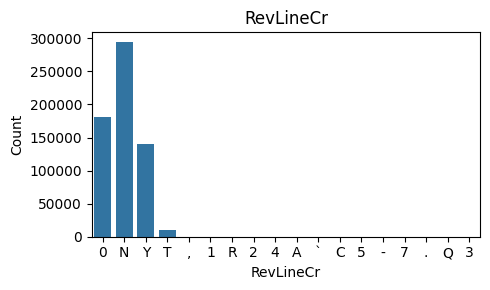

In [40]:
plt.figure(figsize=(5, 3))
plt.subplot(1, 1, 1)
sns.countplot(data=df_train, x='RevLineCr')
plt.title('RevLineCr')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

Observations:

- Nilai 0 seharusnya merepresentasikan No
- Nilai N seharusnya merepresentasikan No
- Nilai Y seharusnya merepresentasikan Yes
- Nilai T seharusnya merepresentasikan True / Yes

Maka beberapa nilai itu kita akan lakukan imputasi.

Agar lebih memudahkan dibandingkan dokumentasi (Y = Yes, N = No), `RevLineCr` akan kita buat menjadi nilai berikut:
- Yes diubah menjadi 1
- No diubah menjadi 0


In [41]:
df_train['RevLineCr'] = df_train['RevLineCr'].str.strip()

In [42]:
# N -> 0, Y -> 1, T -> 1
df_train['RevLineCr'] = df_train['RevLineCr'].apply(lambda x: 0 if x == 'N' else 1 if x == 'Y' else 1 if x == 'T' else x)

In [43]:
# String 0 -> Int 0, String 1 -> Int 1
df_train['RevLineCr'] = df_train['RevLineCr'].apply(lambda x: 0 if x == '0' else 1 if x == '1' else x)

Setelah kita ubah menjadi bentuk yang benar, kita sanity check

In [44]:
df_train['RevLineCr'].value_counts()

RevLineCr
0    474673
1    151560
R        10
`         7
2         5
C         2
,         1
4         1
A         1
5         1
-         1
7         1
.         1
Q         1
3         1
Name: count, dtype: int64

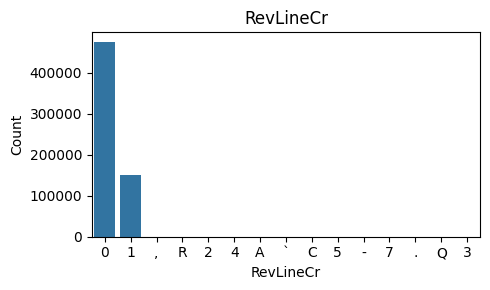

In [45]:
plt.figure(figsize=(5, 3))
plt.subplot(1, 1, 1)
sns.countplot(data=df_train, x='RevLineCr')
plt.title('RevLineCr')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

In [46]:
df_train[(df_train['RevLineCr'] != 0) & (df_train['RevLineCr'] != 1)].shape[0]

3178

In [47]:
df_train.shape[0]

629411

In [48]:
(df_train[(df_train['RevLineCr'] != 0) & (df_train['RevLineCr'] != 1)].shape[0] / df_train.shape[0])*100

0.5049165013004221

Karena jumlah value yang salah hanya 0.5% dari `df_train`, maka kita drop

In [49]:
# Mengganti nilai yang bukan 0 atau 1 dengan NaN
df_train['RevLineCr'] = df_train['RevLineCr'].apply(lambda x: x if x in [0, 1] else np.nan)

In [50]:
df_train.dropna(subset=['RevLineCr'], inplace = True)

Sanity check again..

In [51]:
df_train[(df_train['RevLineCr'] != 0) & (df_train['RevLineCr'] != 1)].shape[0]

0

**HANDLING `LowDoc` IMPUTATION**

Berdasarkan https://www.mortgagechoice.com.au/home-loans/loan-types/low-doc-loan/

LowDoc adalah jenis program pinjaman dimana peminjam tidak melampirkan "proof of income" dan detail bukti jaminan pinjaman lainnya. Biasanya low doc loan ditargetkan untuk orang-orang self employed yang tidak memiliki gaji karena statusnya yang self employed.

Mengutip dari dokumentasi:

*In order to process more loans
efficiently, a “LowDoc Loan” program was implemented where loans under $150,000 can be processed using a one-page appli-
cation. “Yes” indicates loans with a one-page application, and “No” indicates loans with more information attached to the
application.*

In [52]:
df_train['LowDoc'].value_counts()

LowDoc
N    546537
Y     75665
0       885
C       522
S       409
A       356
R        56
1         1
Name: count, dtype: int64

Observations:

Pada dokumentasi dituliskan bahwa `LowDoc` berisi nilai Y = Yes, N = No. Tapi realitanya terdapat value lain selain Y dan N. Maka, imputasi akan saya periksa berdasarkan apakah `GrAppv` atau jumlah pinjaman yang disetujui <= 150.000 untuk `LowDoc` yang bernilai di luar Y atau N, jika bernilai `True` maka imputasi dengan Y. Jika bernilai `False` maka imputasi dengan N, karena pinjaman low doc tidak boleh lebih dari 150.000

Namun sebelumnya `GrAppv` harus kita betulkan terlebih dahulu ke tipe data Int dari Object.

In [53]:
# Before
df_train['GrAppv'].head(3)

695016     $10,000.00 
488153     $83,900.00 
532245    $173,300.00 
Name: GrAppv, dtype: object

In [54]:
# Hapus $, koma, dan spasi di awal dan akhir string (df_train)
df_train['GrAppv'] = df_train['GrAppv'].str.replace('$', '').str.replace(',', '').str.strip()
df_train['GrAppv'] = pd.to_numeric(df_train['GrAppv'], errors='coerce')
df_train['GrAppv'] = df_train['GrAppv'].astype(int)

# Hapus $, koma, dan spasi di awal dan akhir string (df_test)
df_test['GrAppv'] = df_test['GrAppv'].str.replace('$', '').str.replace(',', '').str.strip()
df_test['GrAppv'] = pd.to_numeric(df_test['GrAppv'], errors='coerce')
df_test['GrAppv'] = df_test['GrAppv'].astype(int)

In [55]:
# After
df_train['GrAppv'].head(3)

695016     10000
488153     83900
532245    173300
Name: GrAppv, dtype: int64

Jika `LowDoc` != `Y` dan `LowDoc` != `N`, artinya valuenya ngaco. Jika value ngaco nya memiliki `GrAppv` <= 150.000, pinjaman ini memenuhi kriteria low doc loan. Walaupun belum tentu peminjam mengajukan pinjamannya sebagai low doc loan, namun untuk value ngaco `LowDoc` <= 150.000 akan kita anggap sebagai low doc loan.

Maka:

Jika `LowDoc` != `Y` dan `LowDoc` != `N` dan `GrAppv` <= 150.000, kita imputasi sebagai `Y`

In [56]:
# Jumlah row data yang harus kita imputasi dengan 'Y'
df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] <= 150000)].shape[0]

2583

In [57]:
rule = df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] <= 150000)]

for i in rule.index:
  df_train.loc[i, 'LowDoc'] = 'Y'

Jika `LowDoc` != `Y` dan `LowDoc` != `N` dan `GrAppv` > 100.000, kita imputasi sebagai `N`

In [58]:
# Jumlah row data yang harus kita imputasi dengan 'N'
df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] > 150000)].shape[0]

1448

In [59]:
rule = df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] > 150000)]

for i in rule.index:
  df_train.loc[i, 'LowDoc'] = 'N'

Seharusnya seluruh value ngaco (selain `Y` dan `N` pada LowDoc) sudah kita lakukan imputasi. Sanity check:

In [60]:
# Sanity check
df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] <= 150000)].shape[0]

0

In [61]:
# Sanity check
df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] > 150000)].shape[0]

0

In [62]:
df_train['LowDoc'].isna().sum()

0

**`ChgOffDate` HANDLING**

`ChgoffDate` adalah kolom tanggal suatu pinjaman dinyatakan gagal bayar.

In [63]:
# Jumlah yang null, artinya MIF_Status nya 'ChgOff'
df_train[df_train['ChgOffDate'].isna()].shape[0]

512435

In [64]:
# Jumlah yang not null, artinya MIF_Status nya 'P I F'
df_train[df_train['ChgOffDate'].isna() == False].shape[0]

113798

Sebetulnya NA pada kolom `ChgOffDate` ini artinya adalah pinjaman tersebut `MIF_Status`nya berisi 'P I F'. Dimana artinya NA pada kolom ini menandakan bahwa pinjaman ini tidak memiliki charge off date karena pinjaman dilunasi dengan baik.

Dan juga, `ChgOffDate` sebetulnya mengartikan hal yang sama persis dengan `MIF_Status`, yaitu menandakan apakah customer tersebut melunasi pinjamannya atau gagal bayar. Oleh karena itu, decision pada kolom `ChgOffDate` ini adalah akan didrop seluruhnya.

In [65]:
df_train = df_train.drop(axis=1, columns=['ChgOffDate'])
df_test = df_test.drop(axis=1, columns=['ChgOffDate'])

**`DisbursementDate` HANDLING**

Observations:

`DisbursementDate` tidak bisa dilakukan imputasi berdasarkan mode. Karena secara logika akan menjadi tidak masuk akal. `DisbursementDate` merupakan tanggal dimana pencairan dana oleh SBA dilakukan. `DisbursementDate` pasti waktunya lebih di atas dari `ApprovalDate`. Karena suatu pinjaman pasti harus diapprove dulu, dan berdasarkan analisa dari dataset, sejak suatu pinjaman diapprove sampai dicairkan membutuhkan rentang waktu.

Untuk sekarang ini, `DisbursementDate` akan kita tinggalkan beserta NA valuesnya, karena tidak bisa dilakukan imputasi yang ideal, dan kemungkinan kolom ini masih akan kita butuhkan.

In [66]:
missing_val = df_train.isna().sum()
missing_val = missing_val[missing_val > 0]
print (missing_val)

Name                   7
DisbursementDate    1670
dtype: int64


### Test dataframe

In [67]:
missing_val = df_test.isna().sum()
missing_val = missing_val[missing_val > 0]
print (missing_val)

Name                   7
City                  10
State                  6
Bank                 439
BankState            441
NewExist              45
RevLineCr           1383
LowDoc               780
DisbursementDate     695
dtype: int64


In [68]:
missing_pct = df_test.isnull().sum() * 100 / len(df)
missing_df = pd.DataFrame({'Missing value percentage': missing_pct})
missing_df = missing_df[missing_df['Missing value percentage'] > 0]
print(missing_df)

                  Missing value percentage
Name                              0.000779
City                              0.001112
State                             0.000667
Bank                              0.048823
BankState                         0.049046
NewExist                          0.005005
RevLineCr                         0.153810
LowDoc                            0.086747
DisbursementDate                  0.077294


**HANDLING `City` & `State` IMPUTATION**

Pertama, kita fokus untuk menghandle missing value `City` & `State` dulu. Untuk menentukan `City` & `State`, sebetulnya kita bisa mengkorelasikan dengan `Zip` code. Kita cek apakah row data yang missing value itu memiliki nilai `Zip`.

In [69]:
df_test[(df_test['City'].isnull()) & (df_test['Zip'].isnull() == False)]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
270265,2884192007,"RODIECK PLUMBING SUPPLY,INC ""A",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,15-Jun-81,1981,300,20,2.0,0,0,0,0,N,N,10-Sep-81,"$203,000.00",$0.00,P I F,$0.00,211000,"$211,000.00"
243450,2716822007,"YACHTING &NAVIGATION, LTD",NaN,IL,60624,BANK - AMERICA NATL ASSOC,IL,0,10-Apr-81,1981,300,10,2.0,0,0,0,0,N,N,4-Nov-81,"$150,000.00",$0.00,P I F,$0.00,150000,"$150,000.00"
342951,3391492010,BRAZNELL COMPANY,NaN,MO,63013,ST. LOUIS LOCAL DEVEL CO,MO,0,24-Feb-81,1981,240,50,1.0,0,0,0,0,N,N,10-Jun-81,"$107,000.00",$0.00,P I F,$0.00,107000,"$107,000.00"
342177,3386722002,LEE'S PAWN SHOP,NaN,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,16-Oct-81,1982,300,2,1.0,0,0,0,0,N,N,6-Jan-82,"$25,000.00",$0.00,P I F,$0.00,25000,"$25,000.00"
326169,3258222000,LAKEWOOD HEALTH CARE CENTER LT,NaN,OH,44115,GROWTH CAPITAL CORP.,OH,0,18-Nov-81,1982,300,40,1.0,0,0,0,0,N,N,10-Feb-82,"$205,000.00",$0.00,P I F,$0.00,205000,"$205,000.00"
42535,1330603010,BUSATH PHOTOGRAPHY,NaN,UT,84109,MOUNTAIN W. SMALL BUS. FINAN,UT,0,15-Dec-81,1982,300,2,2.0,0,0,0,0,N,N,6-Jan-82,"$190,000.00",$0.00,P I F,$0.00,190000,"$190,000.00"
437782,4247422000,B. G. WICKBERG COMPANY INC,NaN,MA,2169,SOUTH SHORE ECONOMIC DEVEL COR,MA,0,30-Jan-81,1981,240,18,1.0,0,0,0,0,N,N,9-Dec-81,"$156,000.00",$0.00,P I F,$0.00,156000,"$156,000.00"
342185,3386762003,OLIVE LIGHT LOAN & MERCANTILE,NaN,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,30-Nov-81,1982,180,4,2.0,0,0,0,0,N,N,10-Feb-82,"$71,000.00",$0.00,P I F,$0.00,71000,"$71,000.00"
270268,2884202008,"SAN DIEGO REFRIGERATD SVCS,INC",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,26-Jun-81,1981,180,28,1.0,0,0,0,0,N,N,10-Sep-81,"$407,000.00",$0.00,P I F,$0.00,407000,"$407,000.00"
378899,3662512006,AMERICAN MANAGEMENT ENG ASS IN,NaN,TX,78204,"ACCION TEXAS, INC.",TX,0,2-Jun-81,1981,300,0,1.0,0,0,0,0,N,N,9-Sep-81,"$74,000.00",$0.00,P I F,$0.00,74000,"$74,000.00"


In [70]:
df_test[(df_test['State'].isnull()) & (df_test['Zip'].isnull() == False)]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
366158,3557093005,CASCO SERVICE,CASCO,NaN,54205,UNION STATE BANK,WI,0,19-Oct-89,1990,204,8,1.0,0,0,1,0,N,N,30-Apr-90,"$300,000.00",$0.00,P I F,$0.00,300000,"$252,600.00"
328526,3280213000,KING'S TRUCK WASH,WICHITA,NaN,67219,SOUTH CENT. KANSAS ECONOMIC DE,KS,811192,5-Aug-88,1988,120,17,2.0,10,7,0,0,N,N,12-Jul-89,"$119,000.00",$0.00,P I F,$0.00,119000,"$119,000.00"
871847,9416233003,METRO SHEETMETAL & ERECTION,A452638533,NaN,76052,PROSPERITY BANK,TX,235610,23-Jul-96,1996,84,3,1.0,0,0,1,0,N,Y,31-Jul-96,"$80,000.00",$0.00,P I F,$0.00,80000,"$64,000.00"
379174,3664443009,WILLIAMS JEWELERS,SALT LAKE CITY,NaN,84124,ZIONS FIRST NATIONAL BANK,UT,448310,14-Dec-89,1990,60,4,1.0,0,0,1,0,N,N,31-Jul-90,"$250,000.00",$0.00,P I F,$0.00,250000,"$212,500.00"
264664,2850643009,CENTURY 21 PHILLIPS REALTY,CAMERON PARK,NaN,95682,SBA - EDF ENFORCEMENT ACTION,CO,0,12-Feb-87,1987,240,19,1.0,0,19,0,0,N,N,17-Jun-87,"$81,000.00",$0.00,P I F,$0.00,83000,"$83,000.00"
385418,3714383003,"LAKE MOVIE TYMES, INC.",LAKE OZARK,NaN,65049,CENTRAL BK OF LAKE OF OZARKS,MO,532230,4-Jan-90,1990,60,1,1.0,0,0,1,0,N,N,31-Jan-90,"$75,000.00",$0.00,P I F,$0.00,75000,"$67,500.00"


**Observations:**

Ternyata, row data dari `City` & `State` yang missing memiliki `Zip` code. Sehingga kita bisa melakukan imputasi `City` & `State` berdasarkan `Zip` menggunakan package `uszipcode`. Package `uszipcode` akan mencari kode dari `Zip` code dan memberikan output kotanya. Output tersebut akan kita imputasi ke kolom `City` & `State`

In [71]:
search = SearchEngine()

imputed_rows = []

filter = df_test[(df_test['City'].isnull()) | (df_test['State'].isnull())]

for i in filter.index:
  zipcode = search.by_zipcode(df_test.loc[i, 'Zip'])
  if zipcode:
    df_test.loc[i, 'City'] = zipcode.major_city
    df_test.loc[i, 'State'] = zipcode.state
    imputed_rows.append(i)

df_test.loc[imputed_rows]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
366158,3557093005,CASCO SERVICE,Casco,WI,54205,UNION STATE BANK,WI,0,19-Oct-89,1990,204,8,1.0,0,0,1,0,N,N,30-Apr-90,"$300,000.00",$0.00,P I F,$0.00,300000,"$252,600.00"
270265,2884192007,"RODIECK PLUMBING SUPPLY,INC ""A",San Diego,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,15-Jun-81,1981,300,20,2.0,0,0,0,0,N,N,10-Sep-81,"$203,000.00",$0.00,P I F,$0.00,211000,"$211,000.00"
243450,2716822007,"YACHTING &NAVIGATION, LTD",Chicago,IL,60624,BANK - AMERICA NATL ASSOC,IL,0,10-Apr-81,1981,300,10,2.0,0,0,0,0,N,N,4-Nov-81,"$150,000.00",$0.00,P I F,$0.00,150000,"$150,000.00"
342951,3391492010,BRAZNELL COMPANY,Beaufort,MO,63013,ST. LOUIS LOCAL DEVEL CO,MO,0,24-Feb-81,1981,240,50,1.0,0,0,0,0,N,N,10-Jun-81,"$107,000.00",$0.00,P I F,$0.00,107000,"$107,000.00"
342177,3386722002,LEE'S PAWN SHOP,Saint Louis,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,16-Oct-81,1982,300,2,1.0,0,0,0,0,N,N,6-Jan-82,"$25,000.00",$0.00,P I F,$0.00,25000,"$25,000.00"
326169,3258222000,LAKEWOOD HEALTH CARE CENTER LT,Cleveland,OH,44115,GROWTH CAPITAL CORP.,OH,0,18-Nov-81,1982,300,40,1.0,0,0,0,0,N,N,10-Feb-82,"$205,000.00",$0.00,P I F,$0.00,205000,"$205,000.00"
42535,1330603010,BUSATH PHOTOGRAPHY,Salt Lake City,UT,84109,MOUNTAIN W. SMALL BUS. FINAN,UT,0,15-Dec-81,1982,300,2,2.0,0,0,0,0,N,N,6-Jan-82,"$190,000.00",$0.00,P I F,$0.00,190000,"$190,000.00"
437782,4247422000,B. G. WICKBERG COMPANY INC,Quincy,MA,2169,SOUTH SHORE ECONOMIC DEVEL COR,MA,0,30-Jan-81,1981,240,18,1.0,0,0,0,0,N,N,9-Dec-81,"$156,000.00",$0.00,P I F,$0.00,156000,"$156,000.00"
342185,3386762003,OLIVE LIGHT LOAN & MERCANTILE,Saint Louis,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,30-Nov-81,1982,180,4,2.0,0,0,0,0,N,N,10-Feb-82,"$71,000.00",$0.00,P I F,$0.00,71000,"$71,000.00"
328526,3280213000,KING'S TRUCK WASH,Wichita,KS,67219,SOUTH CENT. KANSAS ECONOMIC DE,KS,811192,5-Aug-88,1988,120,17,2.0,10,7,0,0,N,N,12-Jul-89,"$119,000.00",$0.00,P I F,$0.00,119000,"$119,000.00"


Kita lakukan sanity check untuk `City` setelah dilakukan imputasi.

In [72]:
df_test['City'].isna().sum()

0

Exception ignored in: <function SearchEngine.__del__ at 0x7f60f5eaedd0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1816, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1858, in _close_impl
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 926, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2426, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2649, in _do_close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2635, in _close_impl
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2627, in _connection_rollback_impl
  File

Kita lakukan sanity check untuk `State` setelah dilakukan imputasi.

In [73]:
df_test['State'].isna().sum()

0

**HANDLING `Bank` IMPUTATION**

Sama seperti missing value handling pada `df_train`, kolom nama `Bank` tidak bisa untuk dilakukan imputasi berdasarkan aspek kolom lain, karena tidak berkorelasi. Sehingga imputasi yang akan dilakukan pada kolom `Bank` akan menggunakan modus dari kolom `Bank` tersebut.

In [74]:
df_test['Bank'] = df_test['Bank'].fillna(df_test['Bank'].mode()[0])

Kita lakukan sanity check untuk `Bank` setelah dilakukan imputasi.

In [75]:
df_test['Bank'].isna().sum()

0

**HANDLING `BankState` IMPUTATION**

Berdasarkan hasil observasi missing value handling `BankState` pada `df_train`, hanya sekitar 50% data peminjam yang `BankState`nya sama dengan `State`. Sehingga kesimpulan tersebut juga sama untuk `df_test` ini. Kita tidak bisa mengkorelasikan kalau `BankState` nilainya sama dengan `State`.

Oleh karena itu, untuk `BankState` di sini juga kita akan melakukan imputasi dengan menggunakan modus dari kolom tersebut.

In [76]:
df_test['BankState'] = df_test['BankState'].fillna(df_test['BankState'].mode()[0])

Kita lakukan sanity check untuk `BankState` setelah dilakukan imputasi.

In [77]:
df_test['BankState'].isna().sum()

0

**HANDLING `NewExist` IMPUTATION**

Berdasarkan observasi dari `df_train` sebelumnya, kolom ini tidak memiliki hubungan dengan kolom lain, sehingga kita akan melakukan imputasi menggunakan modus dari kolom tersebut.

In [78]:
df_test['NewExist'] = df_test['NewExist'].fillna(df_test['NewExist'].mode()[0])

Kita lakukan sanity check untuk `NewExist` setelah dilakukan imputasi.

In [79]:
df_test['NewExist'].isna().sum()

0

**HANDLING `RevLineCr` IMPUTATION**

Sama seperti `df_train`, `RevLineCr` seharusnya sesuai dokumentasi hanya berisi Y = Yes, N = No.

Namun setelah dilakukan pengecekan, ternyata ada values yang tidak sesuai dokumentasi.

In [80]:
df_test['RevLineCr'].value_counts()

RevLineCr
N    125982
0     77232
Y     60527
T      4612
1         5
`         4
R         4
2         1
Name: count, dtype: int64

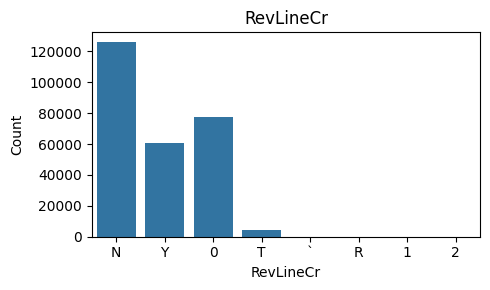

In [81]:
plt.figure(figsize=(5, 3))
plt.subplot(1, 1, 1)
sns.countplot(data=df_test, x='RevLineCr')
plt.title('RevLineCr')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

Observations:

- Nilai 0 seharusnya merepresentasikan No
- Nilai N seharusnya merepresentasikan No
- Nilai Y seharusnya merepresentasikan Yes
- Nilai T seharusnya merepresentasikan True / Yes

Maka beberapa nilai itu kita akan lakukan imputasi.

Agar lebih memudahkan dibandingkan dokumentasi (Y = Yes, N = No), `RevLineCr` akan kita buat menjadi nilai berikut:
- Yes diubah menjadi 1
- No diubah menjadi 0


In [82]:
df_test['RevLineCr'] = df_test['RevLineCr'].str.strip()

In [83]:
# N -> 0, Y -> 1, T -> 1
df_test['RevLineCr'] = df_test['RevLineCr'].apply(lambda x: 0 if x == 'N' else 1 if x == 'Y' else 1 if x == 'T' else x)

In [84]:
# String 0 -> Int 0, String 1 -> Int 1
df_test['RevLineCr'] = df_test['RevLineCr'].apply(lambda x: 0 if x == '0' else 1 if x == '1' else x)

Setelah kita ubah menjadi bentuk yang benar, kita sanity check

In [85]:
df_test['RevLineCr'].value_counts()

RevLineCr
0    203214
1     65144
`         4
R         4
2         1
Name: count, dtype: int64

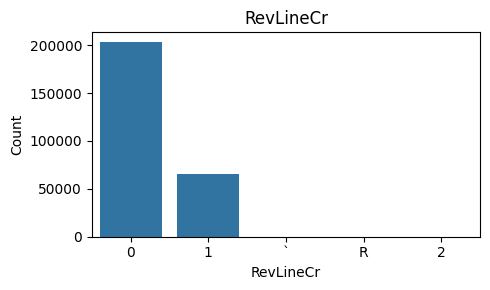

In [86]:
plt.figure(figsize=(5, 3))
plt.subplot(1, 1, 1)
sns.countplot(data=df_test, x='RevLineCr')
plt.title('RevLineCr')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

In [87]:
df_test[(df_test['RevLineCr'] != 0) & (df_test['RevLineCr'] != 1)].shape[0]

1392

In [88]:
df_test.shape[0]

269750

In [89]:
(df_test[(df_test['RevLineCr'] != 0) & (df_test['RevLineCr'] != 1)].shape[0] / df_test.shape[0])*100

0.5160333642261353

Karena jumlah value yang salah hanya 0.5% dari `df_train`, maka kita drop

In [90]:
# Mengganti nilai yang bukan 0 atau 1 dengan NaN
df_test['RevLineCr'] = df_test['RevLineCr'].apply(lambda x: x if x in [0, 1] else np.nan)

In [91]:
df_test.dropna(subset=['RevLineCr'], inplace = True)

Sanity check again..

In [92]:
df_test[(df_test['RevLineCr'] != 0) & (df_test['RevLineCr'] != 1)].shape[0]

0

**HANDLING `LowDoc` IMPUTATION**

Sama seperti `df_train`, imputasi akan saya periksa berdasarkan apakah `GrAppv` atau jumlah pinjaman yang disetujui <= 150.000 untuk `LowDoc` yang bernilai di luar Y atau N, jika bernilai `True` maka imputasi dengan Y. Jika bernilai `False` maka imputasi dengan N, karena pinjaman low doc tidak boleh lebih dari 150.000

Maka:

Jika `LowDoc` != `Y` dan `LowDoc` != `N` dan `GrAppv` <= 150.000, kita imputasi sebagai `Y`

In [93]:
df_test['LowDoc'].value_counts()

LowDoc
N    234143
Y     32491
0       355
C       235
S       194
A       141
R        19
Name: count, dtype: int64

In [94]:
# Jumlah row data yang harus kita imputasi dengan 'Y'
df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] <= 150000)].shape[0]

1117

In [95]:
rule = df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] <= 150000)]

for i in rule.index:
  df_test.loc[i, 'LowDoc'] = 'Y'

Jika `LowDoc` != `Y` dan `LowDoc` != `N` dan `GrAppv` > 100.000, kita imputasi sebagai `N`

In [96]:
# Jumlah row data yang harus kita imputasi dengan 'N'
df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] > 150000)].shape[0]

607

In [97]:
rule = df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] > 150000)]

for i in rule.index:
  df_test.loc[i, 'LowDoc'] = 'N'

Seharusnya seluruh value ngaco (selain `Y` dan `N` pada LowDoc) sudah kita lakukan imputasi. Sanity check:

In [98]:
# Sanity check
df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] <= 150000)].shape[0]

0

In [99]:
# Sanity check
df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] > 150000)].shape[0]

0

In [100]:
df_test['LowDoc'].isna().sum()

0

**`DisbursementDate` HANDLING**

Sama seperti `DisbursementDate` pada `df_train`, kolom ini tidak bisa dilakukan imputasi karena informasinya akan tidak makes sense.

Untuk sekarang ini, `DisbursementDate` akan kita tinggalkan beserta NA valuesnya, karena tidak bisa dilakukan imputasi yang ideal, dan kemungkinan kolom ini masih akan kita butuhkan.

In [101]:
missing_val = df_test.isna().sum()
missing_val = missing_val[missing_val > 0]
print (missing_val)

Name                  7
DisbursementDate    694
dtype: int64


# Duplicate Values Handling

## Train dataframe

In [102]:
print('Total duplicate data: ', df_train.duplicated().sum())

Total duplicate data:  0


## Test dataframe

In [103]:
print('Total duplicate data: ', df_test.duplicated().sum())

Total duplicate data:  0


No duplicate data found. Kita lanjut

# Feature Engineering

## Wrong data type handlings

Di sini, kita akan cek lebih lanjut dan detail per masing-masing kolom, apakah masih ada format yang tidak sesuai

In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626233 entries, 695016 to 225325
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      626233 non-null  int64  
 1   Name               626226 non-null  object 
 2   City               626233 non-null  object 
 3   State              626233 non-null  object 
 4   Zip                626233 non-null  int64  
 5   Bank               626233 non-null  object 
 6   BankState          626233 non-null  object 
 7   NAICS              626233 non-null  int64  
 8   ApprovalDate       626233 non-null  object 
 9   ApprovalFY         626233 non-null  object 
 10  Term               626233 non-null  int64  
 11  NoEmp              626233 non-null  int64  
 12  NewExist           626233 non-null  float64
 13  CreateJob          626233 non-null  int64  
 14  RetainedJob        626233 non-null  int64  
 15  FranchiseCode      626233 non-null  int64  
 16  Ur

In [105]:
df_train.head(3)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
695016,7212624008,DOWNTOWNE LAUNDRIE INC,MOUNT DORA,FL,32757,INNOVATIVE BANK,CA,812320,25-Feb-04,2004,84,1,1.0,1,1,1,0,0.0,N,29-Feb-04,"$10,000.00",$0.00,P I F,$0.00,10000,"$8,500.00"
488153,4698604008,"MIDWEST POWDER COATERS, INC.",RICHFIELD,WI,53076,NATL EXCH BK & TR,WI,332812,20-Jul-01,2001,28,8,1.0,0,0,1,2,0.0,Y,30-Sep-01,"$83,900.00",$0.00,CHGOFF,"$74,364.00",83900,"$71,315.00"
532245,5189664000,SIDNEY CLEANERS & LAUNDRY,SIDNEY,MT,59270,STOCKMAN BANK OF MONTANA,MT,812320,31-Jan-02,2002,144,6,1.0,0,6,1,2,0.0,N,28-Feb-02,"$173,300.00",$0.00,P I F,$0.00,173300,"$129,975.00"


### `ApprovalDate` & `DisbursementDate` diubah dari Object ke Datetime

**`ApprovalDate` & `DisbursementDate` diubah dari Object ke Datetime**

In [106]:
cols = ['ApprovalDate', 'DisbursementDate']

for col in cols:
  df_train[col] = pd.to_datetime(df_train[col])
  df_test[col] = pd.to_datetime(df_test[col])

<ipython-input-106-5c468a5d1d03>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train[col] = pd.to_datetime(df_train[col])
<ipython-input-106-5c468a5d1d03>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test[col] = pd.to_datetime(df_test[col])
<ipython-input-106-5c468a5d1d03>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train[col] = pd.to_datetime(df_train[col])
<ipython-input-106-5c468a5d1d03>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, ple

### `DisbursementGross`, `BalanceGross`, `ChgOffPrinGr`, `SBA_Appv`, `ApprovalFY` diubah ke Int

**`DisbursementGross`, `BalanceGross`, `ChgOffPrinGr`, `SBA_Appv`, `ApprovalFY`, `NewExist` diubah ke Int**

In [107]:
cols_to_convert = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv']

for col in cols_to_convert:
    df_train[col] = df_train[col].replace('[\$,]', '', regex=True).str.replace(',', '').str.strip()
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')
    df_train[col] = df_train[col].astype(int)

    df_test[col] = df_test[col].replace('[\$,]', '', regex=True).str.replace(',', '').str.strip()
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce')
    df_test[col] = df_test[col].astype(int)

Notes:

Ada wrong value pada `ApprovalFY`, dimana ketika dilakukan konversi ke integer, muncul error *ValueError: invalid literal for int() with base 10: '1976A'* yang kemungkinan terjadi karena kesalahan.

Oleh karena itu, kita harus ubah 1976A itu ke 1976 dulu

In [108]:
df_train[df_train['ApprovalFY'] == '1976A']

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
776367,8209901003,FIVE LETTER DELI & GROCERY INC,ST ALBANS,NY,11412,"CITIBANK, N.A.",SD,0,1976-07-15,1976A,60,4,2.0,0,0,0,0,0.0,N,1976-10-28,40000,0,CHGOFF,0,40000,36000
713245,7420741004,THE TOGGERY,SPRINGFIELD,MA,1103,BANK OF AMERICA NATL ASSOC,RI,0,1976-08-30,1976A,84,5,1.0,0,0,0,0,0.0,N,NaT,73000,0,CHGOFF,827,73000,40150
710381,7389331000,BAUMAN'S APPLIANCE,ODESSA,NY,14869,CHEMUNG CANAL TRUST COMPANY,NY,0,1976-07-19,1976A,60,2,2.0,0,0,0,0,0.0,N,1976-08-09,15000,0,CHGOFF,475,15000,13500
788539,8375031008,"HOWARD S. CULVER, INC.",HEBRON,MD,21830,WELLS FARGO BANK NATL ASSOC,MD,0,1976-09-30,1976A,120,39,1.0,0,0,0,0,0.0,N,1976-10-21,275000,0,CHGOFF,218205,275000,247500
781090,8273621007,GILA VALLEY BLOCK CO (SUB),SAFFORD,AZ,85711,FDIC/SOUTHWESTERN BANK,CA,0,1976-07-21,1976A,120,22,1.0,0,0,0,0,0.0,N,1976-08-02,500000,0,CHGOFF,361052,500000,450000
751519,7848911008,MICHAELS TRUCK STOP,CHICAGO,IL,60633,BANK OF AMERICA NATL ASSOC,NC,0,1976-09-29,1976A,120,3,2.0,0,0,0,0,0.0,N,NaT,550000,0,CHGOFF,572877,550000,495000
775430,8197661005,FANGMAN CABINET SHOP,DYERSVILLE,IA,52040,FDIC/DYERSVILLE,IL,0,1976-08-26,1976A,120,9,1.0,0,0,0,0,0.0,N,1977-01-03,72000,0,CHGOFF,8509,72000,64800
780120,8260831001,"WALKER-NEER MANUFACTURING CO.,",WICHITA FALLS,TX,76307,BANK OF AMERICA NATL ASSOC,TX,0,1976-07-29,1976A,174,110,1.0,0,0,0,0,0.0,N,1977-01-28,650000,0,CHGOFF,253484,750000,499500
705375,7334771006,CROWN POINT LUMBER,CROWN POINT,IN,46307,JPMORGAN CHASE BANK NATL ASSOC,IN,0,1976-09-10,1976A,120,5,2.0,0,0,0,0,0.0,N,1977-02-07,145000,0,CHGOFF,0,145000,130500
775002,8191291000,JUG & JIGGER,YUCAIPA,CA,92399,BANK OF AMERICA NATL ASSOC,CA,0,1976-08-20,1976A,84,3,1.0,0,0,0,0,0.0,N,1976-09-20,94500,0,CHGOFF,63182,94500,85050


In [109]:
# Ubah 1976A ke 1976
df_train.loc[df_train['ApprovalFY'] == '1976A', 'ApprovalFY'] = '1976'

In [110]:
df_test[df_test['ApprovalFY'] == '1976A']

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
775978,8204371000,AUTOMOTIVE ELECTRIC REBUILDERS,FAIRBANKS,AK,99701,KEYBANK NATIONAL ASSOCIATION,OR,0,1976-09-01,1976A,240,8,1.0,0,0,0,0,0.0,N,1977-04-15,164679,0,CHGOFF,439,165000,148500
784351,8318051007,BAGLEY & COMPANY,SALT LAKE CITY,UT,84111,JPMORGAN CHASE BANK NATL ASSOC,AZ,0,1976-08-19,1976A,180,4,1.0,0,0,0,0,0.0,N,1976-12-29,350000,0,CHGOFF,130210,350000,315000
788661,8376951004,WELMET CO LTD,OLD BETHPAGE,NY,11804,DEUTSCHE BK TR CO AMERICAS,NY,0,1976-09-14,1976A,60,130,1.0,0,0,0,0,0.0,N,NaT,200000,0,CHGOFF,56948,200000,180000
699732,7268591001,FASHION NOVELTY CORP OF NJ,CARLSTADT,NJ,7072,VALLEY NATIONAL BANK,NJ,0,1976-09-29,1976A,120,36,1.0,0,0,0,0,0.0,N,1976-11-23,350000,0,CHGOFF,48361,350000,315000
748029,7799101004,"JUSTIN TYME,INC.",COLUMBUS,OH,43265,"PNC BANK, NATIONAL ASSOCIATION",OH,0,1976-08-20,1976A,102,10,1.0,0,0,0,0,0.0,N,1976-09-15,150000,0,CHGOFF,87037,150000,135000
704030,7319361003,J W HUGHES HUGHES 66 GLDN PLNS,FOLLETT,TX,79034,FIRSTBANK SOUTHWEST,TX,0,1976-09-17,1976A,120,29,1.0,0,0,0,0,0.0,N,1976-12-01,325000,0,CHGOFF,45910,325000,292500


In [111]:
# Ubah 1976A ke 1976
df_test.loc[df_test['ApprovalFY'] == '1976A', 'ApprovalFY'] = '1976'

In [112]:
df_train['ApprovalFY'] = df_train['ApprovalFY'].astype(int)
df_test['ApprovalFY'] = df_test['ApprovalFY'].astype(int)

### `NewExist` diubah ke Integer

Ubah `NewExist` ke Integer.

In [113]:
df_train['NewExist'] = df_train['NewExist'].astype(int)
df_test['NewExist'] = df_test['NewExist'].astype(int)

In [114]:
df_train['NewExist'].value_counts()

NewExist
1    448979
2    176521
0       733
Name: count, dtype: int64

In [115]:
df_test['NewExist'].value_counts()

NewExist
1    192766
2     75295
0       297
Name: count, dtype: int64

Ternyata, `NewExist` memiliki 3 unique values, yaitu: 0, 1, 2. Padahal sesuai dokumentasi dari source dataset, values pada `NewExist` hanya berisi 2 values, yaitu:
- 1 = Existing business
- 2 = New business

Dan value `0` di sini tidak jelas apakah ini `Existing business` atau `New business`.

Di sini, saya akan cek komparasi dengan kolom `NoEmp`, yaitu jumlah karyawan di bisnis peminjam. Di sini saya mengartikan kalau bisnis itu memiliki 0 karyawan, artinya bisnis itu adalah `New business` yang belum memiliki karyawan.

Maka:

- Jika `NewExist` != 1 dan `NewExist` != 2 dan `NoEmp` == 0, maka kita assign sebagai 2 (New business)

- Jika `NewExist` != 1 dan `NewExist` != 2 dan `NoEmp` != 0, maka kita assign sebagai 1 (Existing business)

In [116]:
rule1 = df_train[((df_train['NewExist'] != 1) & (df_train['NewExist'] != 2)) & (df_train['NoEmp'] == 0)]
rule2 = df_train[((df_train['NewExist'] != 1) & (df_train['NewExist'] != 2)) & (df_train['NoEmp'] != 0)]

rule3 = df_test[((df_test['NewExist'] != 1) & (df_test['NewExist'] != 2)) & (df_test['NoEmp'] == 0)]
rule4 = df_test[((df_test['NewExist'] != 1) & (df_test['NewExist'] != 2)) & (df_test['NoEmp'] != 0)]

for i in rule1.index:
  df_train.loc[i, 'NewExist'] = 2

for i in rule2.index:
  df_train.loc[i, 'NewExist'] = 1

for i in rule3.index:
  df_test.loc[i, 'NewExist'] = 2

for i in rule4.index:
  df_test.loc[i, 'NewExist'] = 1

Kita lakukan sanity check

In [117]:
df_train['NewExist'].value_counts()

NewExist
1    449709
2    176524
Name: count, dtype: int64

In [118]:
df_test['NewExist'].value_counts()

NewExist
1    193063
2     75295
Name: count, dtype: int64

Semua value sudah benar

## Pembuatan feature

### `NAICS` to `IndSec`

In [119]:
df_train['NAICS'].value_counts()

NAICS
0         139768
722110     19733
722211     13580
811111     10138
621210      9689
           ...  
522120         1
212325         1
339910         1
311311         1
311351         1
Name: count, Length: 1302, dtype: int64

NAICS adalah sistem klasifikasi industri di US. Kode NAICS adalah kode enam digit yang spesifik untuk industri, dengan 2 digit pertama adalah kode Sektor Industrinya.

Di sini saya akan membuat feature baru yaitu sektor industri berdasarkan kode NAICS untuk memudahkan analisa dan EDA. Feature baru itu akan dinamakan `IndSec`

Untuk kode NAICS, referensinya didapatkan dari: https://www.census.gov/naics/?58967?yearbck=2022

Notes: Terdapat beberapa `NAICS` yang 2

In [120]:
naics_mapping = {
    '11': 'Agriculture, Forestry, Fishing and Hunting',
    '21': 'Mining, Quarrying, and Oil and Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing', '32': 'Manufacturing', '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade', '45': 'Retail Trade',
    '48': 'Transportation and Warehousing', '49': 'Transportation and Warehousing',
    '51': 'Information',
    '52': 'Finance and Insurance',
    '53': 'Real Estate and Rental and Leasing',
    '54': 'Professional, Scientific, and Technical Services',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative and Support and Waste Management and Remediation Services',
    '61': 'Educational Services',
    '62': 'Health Care and Social Assistance',
    '71': 'Arts, Entertainment, and Recreation',
    '72': 'Accommodation and Food Services',
    '81': 'Other Services (except Public Administration)',
    '92': 'Public Administration'
}

In [121]:
df_train['IndSector'] = df_train['NAICS'].astype(str).str[:2].map(naics_mapping).fillna('Unknown')
df_test['IndSector'] = df_test['NAICS'].astype(str).str[:2].map(naics_mapping).fillna('Unknown')

### `NAICS` to `IndDefRate`

In [122]:
default_rate = {
    '21': 8, '11': 9, '55': 10, '62': 10, '22': 14, '92': 15,
    '54': 19, '42': 19, '31': 19, '32': 16, '33': 14, '81': 20,
    '71': 21, '72': 22, '44': 22, '45': 23, '23': 23, '56': 24,
    '61': 24, '51': 25, '48': 27, '49': 23, '52': 28, '53': 29
}

In [123]:
df_train['IndDefRate'] = df_train['NAICS'].astype(str).str[:2].map(default_rate).fillna(0).astype(int)
df_test['IndDefRate'] = df_test['NAICS'].astype(str).str[:2].map(default_rate).fillna(0).astype(int)

In [124]:
df_train.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,IndSector,IndDefRate
695016,7212624008,DOWNTOWNE LAUNDRIE INC,MOUNT DORA,FL,32757,INNOVATIVE BANK,CA,812320,2004-02-25,2004,84,1,1,1,1,1,0,0.0,N,2004-02-29,10000,0,P I F,0,10000,8500,Other Services (except Public Administration),20
488153,4698604008,"MIDWEST POWDER COATERS, INC.",RICHFIELD,WI,53076,NATL EXCH BK & TR,WI,332812,2001-07-20,2001,28,8,1,0,0,1,2,0.0,Y,2001-09-30,83900,0,CHGOFF,74364,83900,71315,Manufacturing,14


In [125]:
df_test.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,IndSector,IndDefRate
395280,3808784002,L & S CARRY OUT,HILLIARD,OH,43026,THE HUNTINGTON NATIONAL BANK,OH,0,2000-06-26,2000,243,2,1,0,0,1,1,0.0,N,2000-06-30,150000,0,P I F,0,185000,138750,Unknown,0
451751,4380795004,PATRICK LEVINGSTON,Concord,NC,28027,BRANCH BK. & TR CO,NC,722330,2010-11-22,2011,36,2,2,0,2,0,2,0.0,N,2010-12-01,16000,0,P I F,0,16000,8000,Accommodation and Food Services,22


### `ApprovalDate` to `year`, `month`, and `date`

`ApprovalDate` kita pecah menjadi format `tahun`, `bulan`, dan `tanggal`

In [126]:
df_train['approval_date_year'] = pd.to_datetime(df_train['ApprovalDate']).dt.year
df_train['approval_date_month'] = pd.to_datetime(df_train['ApprovalDate']).dt.month
df_train['approval_date_day_of_month'] = pd.to_datetime(df_train['ApprovalDate']).dt.day

In [127]:
df_test['approval_date_year'] = pd.to_datetime(df_test['ApprovalDate']).dt.year
df_test['approval_date_month'] = pd.to_datetime(df_test['ApprovalDate']).dt.month
df_test['approval_date_day_of_month'] = pd.to_datetime(df_test['ApprovalDate']).dt.day

### `FranchiseCode` to `Franchise`

In [128]:
df_train['FranchiseCode'].value_counts()

FranchiseCode
1        444434
0        145904
78760      2325
68020      1359
50564       731
          ...  
28888         1
71130         1
14885         1
68864         1
29702         1
Name: count, Length: 2464, dtype: int64

Berdasarkan guideline, nilai `FranchiseCode` yang bernilai 0 atau 1 adalah No Franchise. Artinya:
- If (`FranchiseCode` != 0) & (`FranchiseCode` != 1) Then `Franchise`
- Else `No Franchise`

Kita akan buat kolom baru berdasarkan apakah bisnis ini merupakan Franchise atau bukan, dan menghilangkan kolom `FranchiseCode` untuk membuat lebih simpel

In [129]:
df_train['Franchise'] = df_train['FranchiseCode'].apply(lambda x: 0 if x in [0, 1] else 1)

In [130]:
df_test['Franchise'] = df_test['FranchiseCode'].apply(lambda x: 0 if x in [0, 1] else 1)

### `NewExist` to `NewBusiness`

NewExist: Indikator apakah bisnis peminjam adalah baru atau sudah ada. Nilainya adalah:
- 1 = Existing business
- 2 = New business

Namun indikator 1 dan 2 seperti ini akan menjadi tidak efisien untuk dilakukan analisa. Karena lumrahnya nilai adalah 0 dan 1 yang merepresentasikan Tidak dan Ya.

Maka di sini saya akan membuat kolom baru bernama `NewBusiness` yang merupakan indikator apakah bisnis peminjam adalah baru atau tidak (sudah ada). Nilainya adalah:
- 0 = Tidak (Bisnis sudah ada sebelumnya)
- 1 = Ya (New Business)

In [131]:
df_train['NewExist'].value_counts()

NewExist
1    449709
2    176524
Name: count, dtype: int64

In [132]:
df_train['NewBusiness'] = df_train['NewExist'].apply(lambda x: 0 if x == 1 else 1)
df_test['NewBusiness'] = df_test['NewExist'].apply(lambda x: 0 if x == 1 else 1)

### `CreateJob` to `IsCreatedJob`

`CreateJob` adalah jumlah pekerjaan yang diciptakan selama durasi (`Term`) peminjam melakukan pinjaman sebelum status dari `MIS_Status` berubah (lunas atau gagal bayar). Di sini bisa dibuat feature baru sebagai indikator apakah bisnis peminjam menghasilkan lapangan kerja baru atau tidak.
- Jika `CreateJob` = 0, artinya bisnis tersebut tidak menghasilkan lapangan kerja baru.
- Jika `CreateJob` != 0, artinya bisnis tersebut menghasilkan lapangan kerja baru.

Maka di sini akan dibuat kolom baru bernama `IsCreatedJob` sebagai indikator apakah bisnis menghasilkan lapangan kerja atau tidak. Nilainya adalah:
- 0 = Tidak
- 1 = Ya

In [133]:
df_train['IsCreatedJob'] = df_train['CreateJob'].apply(lambda x: 0 if x == 0 else 1)
df_test['IsCreatedJob'] = df_test['CreateJob'].apply(lambda x: 0 if x == 0 else 1)

# Outliers Handling

In [134]:
df_train.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,IndSector,IndDefRate,approval_date_year,approval_date_month,approval_date_day_of_month,Franchise,NewBusiness,IsCreatedJob
695016,7212624008,DOWNTOWNE LAUNDRIE INC,MOUNT DORA,FL,32757,INNOVATIVE BANK,CA,812320,2004-02-25,2004,84,1,1,1,1,1,0,0.0,N,2004-02-29,10000,0,P I F,0,10000,8500,Other Services (except Public Administration),20,2004,2,25,0,0,1
488153,4698604008,"MIDWEST POWDER COATERS, INC.",RICHFIELD,WI,53076,NATL EXCH BK & TR,WI,332812,2001-07-20,2001,28,8,1,0,0,1,2,0.0,Y,2001-09-30,83900,0,CHGOFF,74364,83900,71315,Manufacturing,14,2001,7,20,0,0,0


In [135]:
numerical = ['Zip','NAICS', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
             'RetainedJob', 'FranchiseCode', 'UrbanRural', 'DisbursementGross',
             'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'IndDefRate']

For `df_train`

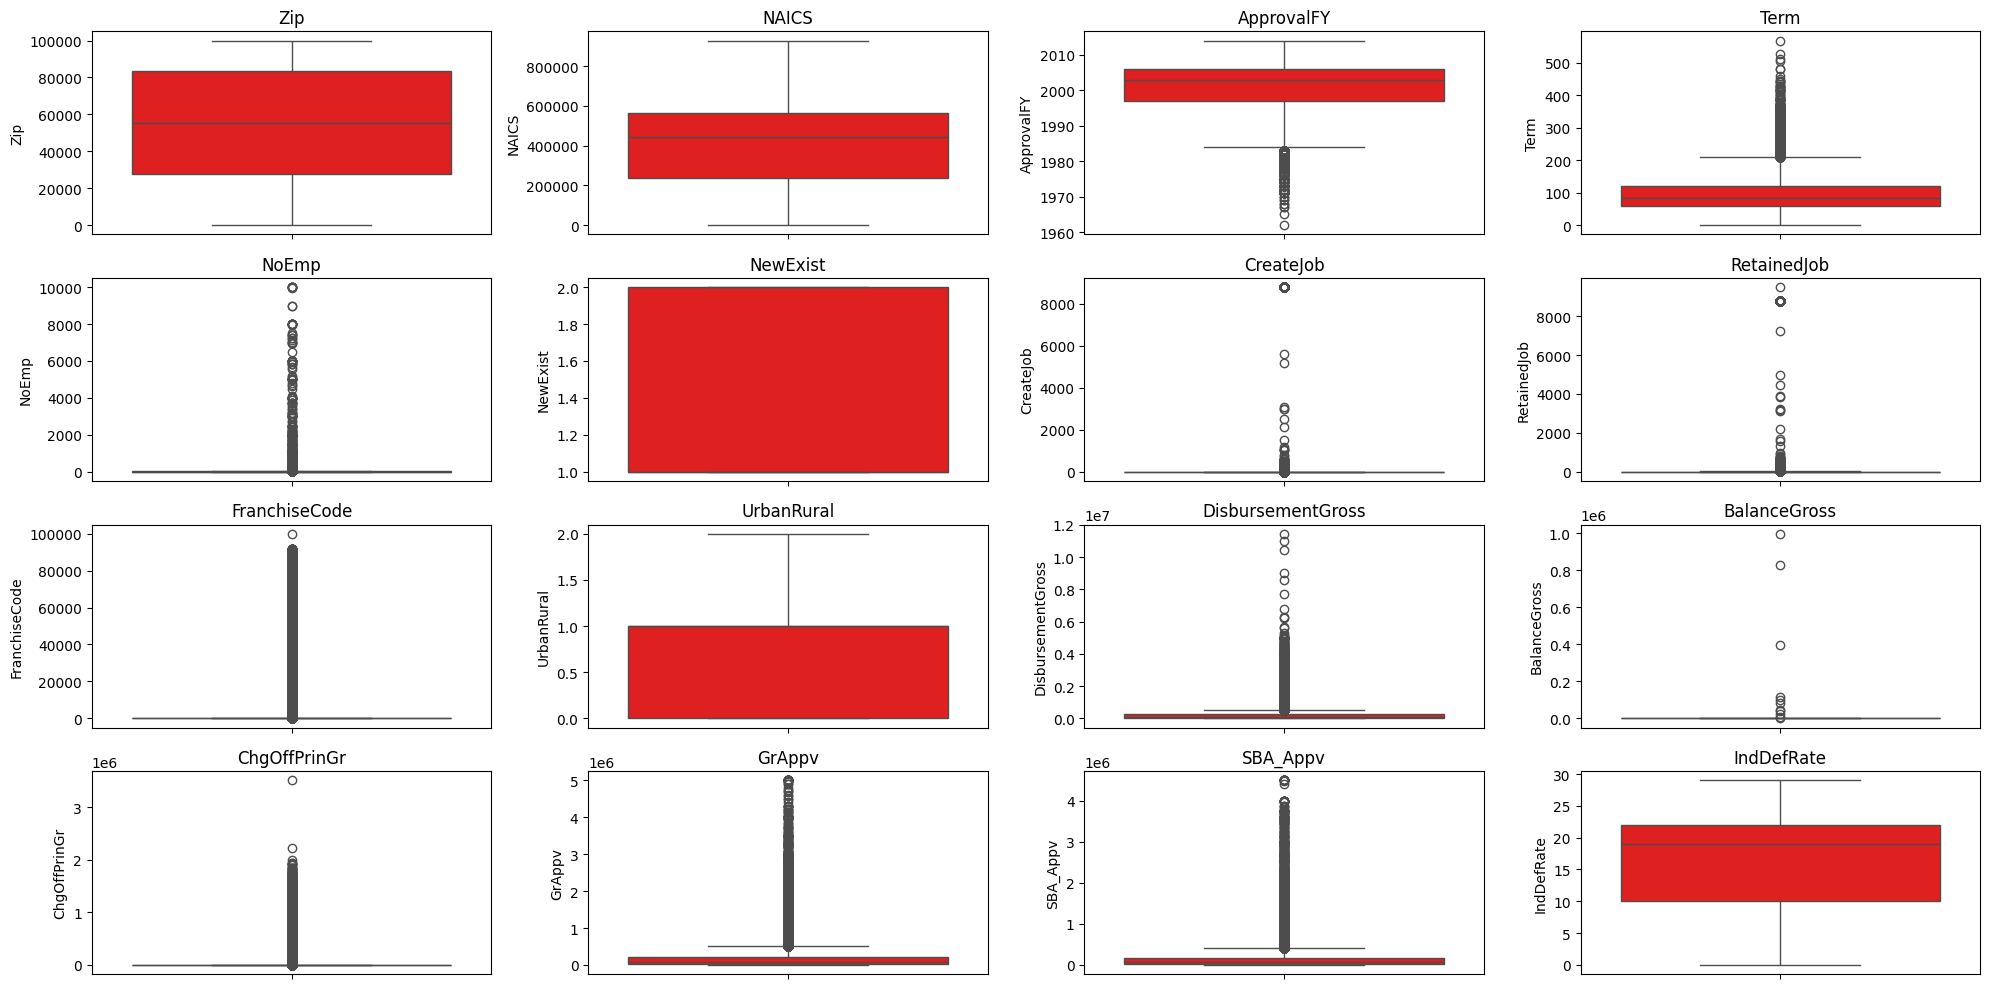

In [136]:
plt.figure(figsize=(20, 10))
for i in range(0, len(numerical)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df_train[numerical[i]], color='red')
    plt.title(numerical[i])
    plt.tight_layout()

plt.show()

For `df_test`

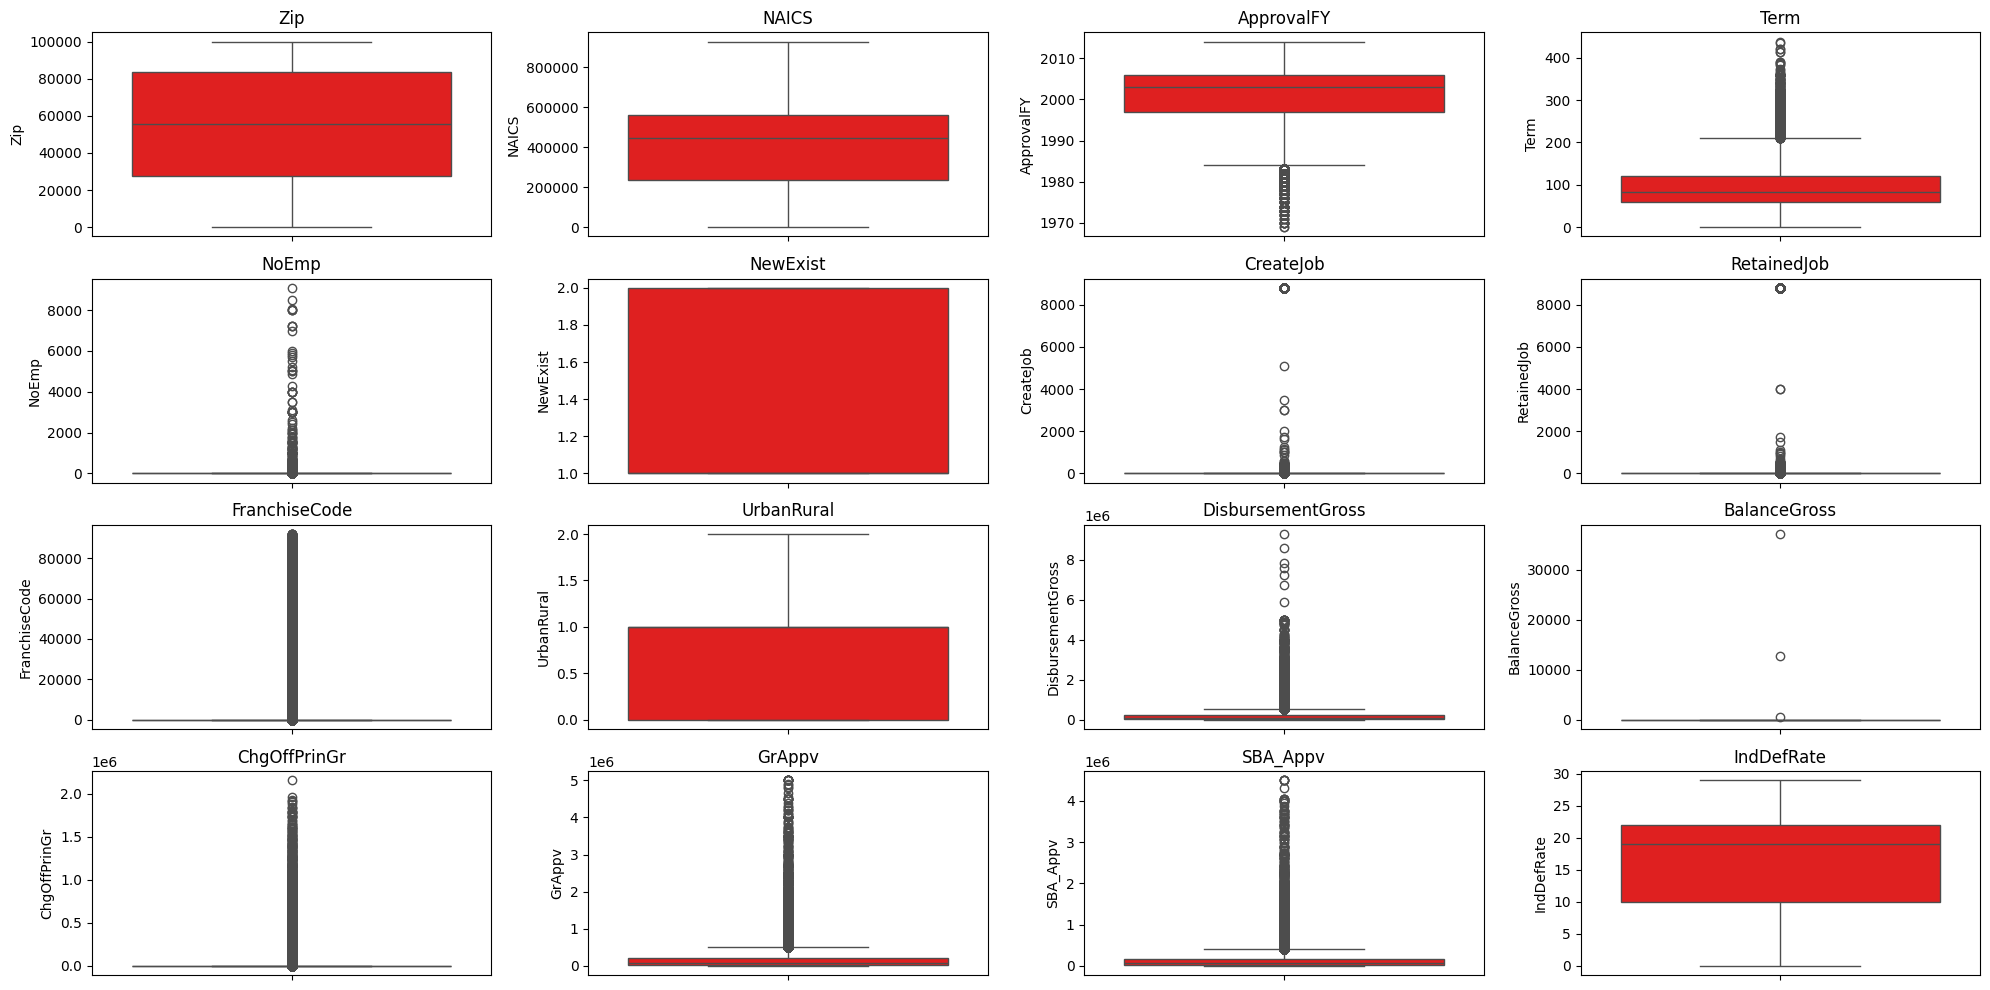

In [137]:
plt.figure(figsize=(20, 10))
for i in range(0, len(numerical)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df_test[numerical[i]], color='red')
    plt.title(numerical[i])
    plt.tight_layout()

plt.show()

# EDA

Kita gabungkan `df_train` dan `df_test` menjadi `df_eda` agar proses analisa dan mencari insight lebih mudah.

In [138]:
df_pre_eda = pd.concat([df_train, df_test], ignore_index=True)

In [139]:
df_pre_eda.describe()

,LoanNr_ChkDgt,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,DisbursementDate,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,IndDefRate,approval_date_year,approval_date_month,approval_date_day_of_month,Franchise,NewBusiness,IsCreatedJob
count,8.945910e+05,894591.000000,894591.000000,894591,894591.000000,894591.000000,894591.000000,894591.000000,894591.000000,894591.000000,894591.000000,894591.000000,894591.000000,892227,8.945910e+05,894591.000000,8.945910e+05,8.945910e+05,8.945910e+05,894591.000000,894591.000000,894591.000000,894591.000000,894591.000000,894591.000000,894591.000000
mean,4.757744e+09,53796.784866,399405.147570,2001-06-12 17:38:32.848217984,2001.165629,110.671079,11.402799,1.281491,8.463938,10.846644,2752.496293,0.760782,0.242238,2001-10-02 07:27:32.233792384,2.010986e+05,3.004630,1.355863e+04,1.925733e+05,1.492726e+05,15.642713,2000.948578,6.501086,16.199369,0.057550,0.281491,0.301001
min,1.000014e+09,0.000000,0.000000,1974-01-09 00:00:00,1962.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1974-01-07 00:00:00,0.000000e+00,0.000000,0.000000e+00,2.000000e+02,1.000000e+02,0.000000,1974.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.581685e+09,27560.000000,235310.000000,1996-12-23 00:00:00,1997.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1997-06-11 00:00:00,4.200000e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04,10.000000,1996.000000,4.000000,9.000000,0.000000,0.000000,0.000000
50%,4.341293e+09,55408.000000,445310.000000,2002-10-10 00:00:00,2003.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2003-01-31 00:00:00,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.100000e+04,19.000000,2002.000000,6.000000,16.000000,0.000000,0.000000,0.000000
75%,6.851874e+09,83705.000000,561740.000000,2006-01-25 00:00:00,2006.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,0.000000,2006-04-30 00:00:00,2.380000e+05,0.000000,0.000000e+00,2.250000e+05,1.750000e+05,22.000000,2006.000000,9.000000,24.000000,0.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,2073-12-20 00:00:00,2014.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,1.000000,2073-12-24 00:00:00,1.144632e+07,996262.000000,3.512596e+06,5.000000e+06,4.500000e+06,29.000000,2073.000000,12.000000,31.000000,1.000000,1.000000,1.000000
std,2.534581e+09,31192.290464,263045.803804,NaN,5.909851,78.837777,74.255220,0.449726,237.291257,237.724160,12754.920222,0.645863,0.428438,NaN,2.873248e+05,1445.843248,6.528131e+04,2.828844e+05,2.276770e+05,9.268030,5.960146,3.357965,8.765414,0.232891,0.449726,0.458694


In [143]:
df_pre_eda[(df_pre_eda['DisbursementGross'] > 0) & (df_pre_eda['DisbursementGross'] < 100)]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,IndSector,IndDefRate,approval_date_year,approval_date_month,approval_date_day_of_month,Franchise,NewBusiness,IsCreatedJob
3289,1392605008,"MEDIA ELECTRIC, INC.",ARLINGTON,MA,2476,CITIZENS BANK NATL ASSOC,RI,711510,2005-07-29,2005,84,3,1,1,4,0,1,0.0,N,2006-11-30,25,0,P I F,0,5000,2500,"Arts, Entertainment, and Recreation",21,2005,7,29,0,0,1
4233,2686085007,"ROWE'S OF STITCHES, INC.",LANDENBERG,PA,19350,CITIZENS BANK NATL ASSOC,RI,451130,2007-09-07,2007,84,2,2,0,2,0,1,0.0,N,2007-12-31,11,0,P I F,0,800,400,Retail Trade,23,2007,9,7,0,1,0
17118,2068065004,Redhawk Auto Sales,MESA,AZ,85207,JPMORGAN CHASE BANK NATL ASSOC,IL,441120,2006-10-12,2007,84,1,2,0,1,0,1,0.0,N,2007-01-31,1,0,P I F,0,25000,12500,Retail Trade,22,2006,10,12,0,1,0
24698,1127455010,SEAN NAVA DBA PRECISION AUTOMO,SCHENECTADY,NY,12304,CITIZENS BANK NATL ASSOC,RI,811111,2004-12-13,2005,84,1,2,0,0,1,1,0.0,N,2005-11-30,41,0,P I F,0,10000,5000,Other Services (except Public Administration),20,2004,12,13,0,1,0
40877,1192425008,HIGHGATE PROFESSIONAL PHARMACY,BUFFALO,NY,14215,CITIZENS BANK NATL ASSOC,RI,446110,2005-02-11,2005,84,4,1,0,4,1,1,0.0,N,2005-08-31,2,0,P I F,0,5000,2500,Retail Trade,22,2005,2,11,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836326,1630805005,AVELLINO L.L.C,SOUTHFIELD,MI,48076,CITIZENS BANK NATL ASSOC,RI,541810,2006-01-25,2006,84,2,2,2,4,0,1,0.0,N,2006-03-31,29,0,P I F,0,25000,12500,"Professional, Scientific, and Technical Services",19,2006,1,25,0,1,1
841014,1959765001,R.L.I. ELECTRIC L.L.C.,DURHAM,CT,6422,CITIZENS BANK NATL ASSOC,RI,238210,2006-08-08,2006,84,1,1,0,1,0,1,0.0,N,2006-09-30,90,0,P I F,0,5000,2500,Construction,23,2006,8,8,0,0,0
849658,3176784003,JUMASOL LIQUORS INC,NEW YORK,NY,10032,BANCO POPULAR NORTH AMERICA,NY,445310,1999-09-14,1999,84,3,1,3,3,1,1,0.0,N,2002-05-31,13,0,P I F,0,50000,25000,Retail Trade,22,1999,9,14,0,0,1
882518,1951005002,"MAY ENGINEERING,LLC",PAWCATUCK,CT,6379,CITIZENS BANK NATL ASSOC,RI,541310,2006-08-02,2006,84,1,1,0,1,0,2,0.0,N,2006-09-30,27,0,P I F,0,3000,1500,"Professional, Scientific, and Technical Services",19,2006,8,2,0,0,0


In [141]:
adadsad

NameError: name 'adadsad' is not defined

## Anomalies on the data

Ada beberapa kejanggalan pada dataset, seperti:

### Tanggal `ApprovalDate` yang tidak wajar

`ApprovalDate` memiliki minimum value tahun 1974, dan maximum value tahun 2073. Sedangkan dokumentasi dari data ini hanya pada rentang waktu 1987 - 2014.

**`ApprovalDate` yang memiliki tahun di atas 2014**

In [ ]:
df_train[df_train['ApprovalDate'] > pd.Timestamp('2014-12-31')].shape[0]

In [ ]:
df_test[df_test['ApprovalDate'] > pd.Timestamp('2014-12-31')].shape[0]

**`ApprovalDate` yang memiliki tahun di bawah 1987**

In [ ]:
df_train[df_train['ApprovalDate'] < pd.Timestamp('1987-1-1')].shape[0]

In [ ]:
df_test[df_test['ApprovalDate'] < pd.Timestamp('1987-1-1')].shape[0]

**Drop tanggal yang tidak wajar**

In [ ]:
row_drop_train = df_train[(df_train['ApprovalDate'] > pd.Timestamp('2014-12-31')) |
 (df_train['ApprovalDate'] < pd.Timestamp('1987-1-1'))].index

row_drop_test = df_test[(df_test['ApprovalDate'] > pd.Timestamp('2014-12-31')) |
 (df_test['ApprovalDate'] < pd.Timestamp('1987-1-1'))].index

In [ ]:
df_train = df_train.drop(row_drop_train)
df_test = df_test.drop(row_drop_test)

Let's do sanity check

In [ ]:
df_train[(df_train['ApprovalDate'] > pd.Timestamp('2014-12-31')) |
 (df_train['ApprovalDate'] < pd.Timestamp('1987-1-1'))].shape[0]

In [ ]:
df_test[(df_test['ApprovalDate'] > pd.Timestamp('2014-12-31')) |
 (df_test['ApprovalDate'] < pd.Timestamp('1987-1-1'))].shape[0]

### `Zip` code yang tidak wajar

Terdapat `Zip` code yang nilainya 0 dan 99999, dimana code tersebut tidak exist in real life. Dari sini kita ketahui kalau ada inputan `Zip` yang salah.

In [ ]:
df_train[(df_train['Zip'] == 0) | (df_train['Zip'] == 99999)].shape[0]

In [ ]:
df_test[(df_test['Zip'] == 0) | (df_test['Zip'] == 99999)].shape[0]

Kita make sure lagi apakah ada `Zip` yang tidak termasuk ke dalam list kode pos yang ada di US.

Di sini saya akan menggunakan package `uszipcode` yang berisi database seluruh kode pos yang ada di US.
1. Membuka ZIP code dari 00000 sampai 99999 pada package `uszipcode`
2. Nilai dari `Zip` akan dibandingkan dengan data `uszipcode` tersebut
3. Di df_train akan sementara dibentuk kolom `is_valid_zip` sebagai acuan valid atau tidaknya isian `Zip` (True = Valid, False = Tidak Valid)

In [ ]:
search = SearchEngine()

# Mendapatkan semua ZIP code dari 0 sampai 99999
all_zip_codes = set()
for i in range(1, 100000):
    zipcode = str(i).zfill(5)
    if search.by_zipcode(zipcode):
        all_zip_codes.add(zipcode)

**Cek pada `df_train`**

In [ ]:
# df_train['Zip_str'] = df_train['Zip'].astype(str).str.zfill(5)
# df_train['is_valid_zip'] = df_train['Zip_str'].isin(all_zip_codes)

In [ ]:
# df_train[~df_train['is_valid_zip']].shape[0]

In [ ]:
# df_train[~df_train['is_valid_zip']].head(5)

In [ ]:
# invalid_zip_codes = df_train[~df_train['is_valid_zip']]

In [ ]:
# # Save sebelum dilakukan imputasi untuk dibandingkan nanti
# invalid_zip_codes_saved = invalid_zip_codes.copy()

In [ ]:
# Mencari ZIP code berdasarkan kota dan negara bagian

# LIVE Disimpen di cache biar lebih cepet, kalo gk lama banget
# city_state_cache = {}
# def find_zipcode(city, state):
#     key = (city, state)
#     if key in city_state_cache:
#         return city_state_cache[key]
#     try:
#         result = search.by_city_and_state(city, state)
#         if result:
#             city_state_cache[key] = result[0].zipcode
#             return result[0].zipcode
#     except ValueError:
#         city_state_cache[key] = None
#     return None

# UNUSED! cara lama nggak pakai cache, lama banget
# def find_zipcode(city, state):
#     try:
#         result = search.by_city_and_state(city, state)
#         if result:
#             return result[0].zipcode
#     except ValueError:
#         return None
#     return None

In [ ]:
# # DataFrame untuk menyimpan baris yang tidak dapat diimputasi
# unmatched_rows = pd.DataFrame(columns=df_train.columns)

# # Imputasi ZIP code yang salah
# for index, row in invalid_zip_codes.iterrows():
#     correct_zip = find_zipcode(row['City'], row['State'])
#     if correct_zip:
#         df_train.at[index, 'Zip'] = correct_zip
#     else:
#         unmatched_rows = pd.concat([unmatched_rows, pd.DataFrame([row])], ignore_index=True)

Lalu kita bandingkan 5 row teratas yang invalid (sesudah diimputasi), dengan 5 row teratas yang invalid (sebelum diimputasi)

In [ ]:
# df_train[~df_train['is_valid_zip']].head(5)

In [ ]:
# invalid_zip_codes_saved.head(5)

Lalu setelah dilakukan imputasi, ternyata masih ada `Zip` yang salah dengan `City` atau `State` yang tidak terdaftar di `uszipcode`. Ini sepertinya harus dibuang karena tidak bisa diimputas apapun.

In [ ]:
# unmatched_rows.shape[0]

In [ ]:
# unmatched_rows.head(5)

In [ ]:
# THIS CELL TO REMOVE THE UNMATCHED ROWS LATER! <--- REMEMBER

Lalu kita buang kolom `Zip_str` dan `is_valid_zip` pada dataframe karena sudah tidak digunakan. Mereka hanya digunakan untuk membandingkan apakah `Zip` valid atau tidak saja

In [ ]:
# # Buang 'Zip_str', 'is_valid_zip' soalnya sudah tidak berguna (mereka untuk ngecek aja)
# df_train = df_train.drop(columns=['Zip_str', 'is_valid_zip'])

**Cek pada `df_test`**

In [ ]:
# df_test['Zip_str'] = df_test['Zip'].astype(str).str.zfill(5)
# df_test['is_valid_zip'] = df_test['Zip_str'].isin(all_zip_codes)

In [ ]:
# df_test[~df_test['is_valid_zip']].shape[0]

In [ ]:
# df_test[~df_test['is_valid_zip']].head(5)

In [ ]:
# invalid_zip_codes = df_test[~df_test['is_valid_zip']]

In [ ]:
# # DataFrame untuk menyimpan baris yang tidak dapat diimputasi
# unmatched_rows = pd.DataFrame(columns=df_test.columns)

# # Imputasi ZIP code yang salah
# for index, row in invalid_zip_codes.iterrows():
#     correct_zip = find_zipcode(row['City'], row['State'])
#     if correct_zip:
#         df_test.at[index, 'Zip'] = correct_zip
#     else:
#         unmatched_rows = pd.concat([unmatched_rows, pd.DataFrame([row])], ignore_index=True)

Lalu kita bandingkan 5 row teratas yang invalid (sesudah diimputasi), dengan 5 row teratas yang invalid (sebelum diimputasi)

In [ ]:
# df_train[~df_train['is_valid_zip']].head(5)

In [ ]:
# invalid_zip_codes_saved.head(5)

Lalu setelah dilakukan imputasi, ternyata masih ada `Zip` yang salah dengan `City` atau `State` yang tidak terdaftar di `uszipcode`. Ini sepertinya harus dibuang karena tidak bisa diimputas apapun.

In [ ]:
# unmatched_rows.shape[0]

In [ ]:
# unmatched_rows.head(5)

In [ ]:
# THIS CELL TO REMOVE THE UNMATCHED ROWS LATER! <--- REMEMBER

Lalu kita buang kolom `Zip_str` dan `is_valid_zip` pada dataframe karena sudah tidak digunakan. Mereka hanya digunakan untuk membandingkan apakah `Zip` valid atau tidak saja

In [ ]:
# # Buang 'Zip_str', 'is_valid_zip' soalnya sudah tidak berguna (mereka untuk ngecek aja)
# df_test = df_test.drop(columns=['Zip_str', 'is_valid_zip'])

## Descriptive Statistics

Mari kita gabungkan `df_train` dan `df_test` kembali setelah dilakukan perbaikan-perbaikan di pre-eda sebelumnya (dimana banyak anomalies pada data)

In [ ]:
df_eda = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
df_eda.describe()

In [ ]:
non_numeric_columns = df_eda.select_dtypes(exclude=['int', 'float']).columns

In [ ]:
df_eda[non_numeric_columns].describe(include=[object])

## Distribusi Pinjaman

In [ ]:
df_eda['MIS_Status'].value_counts()

In [ ]:
status_counts = df_eda['MIS_Status'].value_counts()

plt.figure(figsize=(12, 6))
colors = sns.color_palette("viridis", len(status_counts))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3))
plt.title('Distribusi Loan Status', size=16)

# Adding legend
plt.legend(title='Loan Status', labels=['Paid In Full (PIF)', 'Chargeoff (CHGOFF)'], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

## Lama Pinjaman (`Term`)

### Term terhadap MIS_Status

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MIS_Status', y='Term', data=df_eda, palette=['darkturquoise', 'salmon'])
plt.title('Distribusi Term Pinjaman berdasarkan MIS_Status', fontsize=16)
plt.xlabel('MIS_Status', fontsize=14)
plt.ylabel('Loan Term (Bulan)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# # Buat binning (range 12)
# bins = range(0, int(df_eda['Term'].max()) + 12, 12)
# labels = [f'{i}-{i+11}' for i in bins[:-1]]
# df_eda['Term_binning'] = pd.cut(df_eda['Term'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
# Binning up to 300
bins = range(0, 301, 12)
labels = [f'{i}-{i+11}' for i in bins[:-1]]
df_eda['Term_binning_1to300'] = pd.cut(df_eda['Term'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
# Binning 300 ke atas
bins = range(300, int(df_eda['Term'].max()) + 12, 12)
labels = [f'{i}-{i+11}' for i in bins[:-1]]
df_eda['Term_binning_300up'] = pd.cut(df_eda['Term'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
df_filtered = df_eda[df_eda['Term'] <= 300]

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Term_binning_1to300', hue='MIS_Status', data=df_filtered, palette=['darkturquoise', 'salmon'])
plt.title('Distribusi Term 0-299 berdasarkan MIS_Status', fontsize=16)
plt.xlabel('Loan Term (Bulan)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yscale('log')  # Set y-axis to log scale
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.legend(title='MIS_Status', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
df_filtered = df_eda[df_eda['Term'] > 300]

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Term_binning_300up', hue='MIS_Status', data=df_filtered, palette=['darkturquoise', 'salmon'])
plt.title('Distribusi Term 300+ berdasarkan MIS_Status', fontsize=16)
plt.xlabel('Loan Term (Bulan)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yscale('log')  # Set y-axis to log scale
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding annotations
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.legend(title='MIS_Status', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

### Term per Industry Sector

In [ ]:
max_label_length = 30
df_eda['IndSector'] = df_eda['IndSector'].apply(
    lambda x: x if len(x) <= max_label_length else x[:max_label_length] + '...'
)

plt.figure(figsize=(16, 8))
sns.boxplot(data=df_eda, y='IndSector', x='Term', palette='Set3')

plt.title('Lama Pinjaman berdasarkan Sektor Industri', fontsize=15)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Nama Sektor', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

### Observations

Observations:
- Term pinjaman 48 - 59 dan 72 - 83 bulan memiliki jumlah pinjaman yang sangat tinggi.
- Pada seluruh interval `Term`, jumlah pinjaman yang "Paid in Full" hampir selalu lebih tinggi dibandingkan dengan "Charged Off".
- Jumlah pinjaman dengan `Term` lebih dari 300 bulan sangat sedikit. Mayoritas ada di 300 - 311.
- Pinjaman dengan `Term` yang sangat panjang (lebih dari 300 bulan) juga cenderung lebih sering "Paid in Full" dibandingkan "Charged Off".
- Secara umum, term pinjaman bervariasi secara signifikan antara berbagai sektor industri. Beberapa sektor cenderung mengambil pinjaman jangka pendek, sementara yang lain lebih sering mengambil pinjaman jangka panjang.

### Business Recommendations

1. Karena `Term` yang panjang cenderung lebih sering lunas, maka SBA dapat mempertimbangkan untuk menawarkan opsi `Term` yang lebih panjang kepada peminjam. Ini bisa membantu peminjam dalam mengelola arus kas dengan lebih baik dan memberikan waktu yang cukup untuk menghasilkan pendapatan yang cukup untuk melunasi pinjaman.
2. SBA dapat mempertimbangkan penyesuaian kebijakan suku bunga untuk `Term` jangka panjang. SBA dapat mempertimbangkan untuk menawarkan suku bunga yang lebih rendah untuk pinjaman dengan term yang lebih panjang.

## Pinjaman berdasarkan Tahun (ApprovalDate Year)

### Frekuensi Pinjaman (Total)

In [ ]:
loan_freq_counts = df_eda.groupby('approval_date_year').size().reset_index(name='Frequency')

plt.figure(figsize=(12, 6))
sns.barplot(data=loan_freq_counts, x='approval_date_year', y='Frequency', palette='viridis')

plt.title('Total Frekuensi Pinjaman (Yearly)', fontsize=20)
plt.xlabel('Approval Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Frekuensi Pinjaman (Berdasarkan MIS Status)

In [ ]:
df_pif = df_eda[df_eda['MIS_Status'] == 'P I F']
df_chgoff = df_eda[df_eda['MIS_Status'] == 'CHGOFF']

loan_counts_pif = df_eda[df_eda['MIS_Status'] == 'P I F'].groupby('approval_date_year').size().reset_index(name='Frequency')
loan_counts_chgoff = df_chgoff.groupby('approval_date_year').size().reset_index(name='Frequency')

# Membuat grafik
plt.figure(figsize=(14, 8))

# Garis untuk P I F
sns.lineplot(data=loan_counts_pif, x='approval_date_year', y='Frequency', marker='o', label='P I F', color='blue')

# Garis untuk CHGOFF
sns.lineplot(data=loan_counts_chgoff, x='approval_date_year', y='Frequency', marker='o', label='CHGOFF', color='red')

plt.title('Total Frekuensi Pinjaman (Yearly) berdasarkan MIS_Status', fontsize=20)
plt.xlabel('Approval Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='MIS Status')
plt.tight_layout()

plt.show()

In [ ]:
# loan_counts_per_year = df_eda.groupby('approval_date_year').size().reset_index(name='Frequency')

# plt.figure(figsize=(14, 8))
# sns.lineplot(data=loan_counts_per_year, x='approval_date_year', y='Frequency', marker='o')

# plt.title('Loan Approval Frequency by Year', fontsize=20)
# plt.xlabel('Approval Year', fontsize=15)
# plt.ylabel('Frequency', fontsize=15)

# plt.grid(True)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.tight_layout()

# plt.show()

### Total Pinjaman or Total `DisbursementGross` ($)

In [ ]:
loan_total_counts = df_eda.groupby('approval_date_year')['DisbursementGross'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=loan_total_counts, x='approval_date_year', y='DisbursementGross', palette='viridis')

plt.title('Total Disbursement Pinjaman (Yearly)', fontsize=20)
plt.xlabel('Approval Year', fontsize=15)
plt.ylabel('Total Disbursement Gross', fontsize=15)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

def y_fmt(x, y):
    return f'${x:,.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Observations

- Terlihat bahwa: baik dari total frekuensi pinjaman (keseluruhan, P I F, dan CHGOFF) dan total disbursement yang disetujui meningkat dari tahun 1987 hingga mencapai tahun 2006, dan setelah itu mengalami penurunan sampai tahun 2014 (tahun terakhir data direkap).
- Periode tahun 1987 hingga tahun 2006 menunjukkan peningkatan yang stabil dalam jumlah pinjaman dan total disbursement. Hal tersebut menunjukkan bahwa ekonomi pada periode tersebut relatif stabil dan mengalami peningkatan.
- Penurunan tajam baik dari total frekuensi pinjaman dan total disbursement mungkin adalah pengaruh dari krisis keuangan global tahun 2008. Saat itu karena banyaknya pinjaman yang gagal bayar, maka **bank & lembaga keuangan (termasuk SBA) memperketat standar pemberian kredit** mereka secara signifikan setelah krisis. Mereka menjadi lebih berhati-hati dalam memberikan pinjaman, baik kepada individu maupun bisnis, untuk mengurangi risiko gagal bayar. Sehingga **approval terhadap pinjaman pun menurun**.

Informasi:

Puncak krisis keuangan global terjadi pada tahun 2008. Krisis keuangan global (The Grate Recession) terjadi karena banyak bank & lembaga keuangan (termasuk SBA) memberikan banyak pinjaman ke peminjam yang berisiko tinggi dan kredit buruk. Pinjaman ini sering kali disertai dengan suku bunga yang lebih tinggi, sehingga peminjam lebih tidak bisa membayar. (Sumber: https://www.wallstreetmojo.com/2008-financial-crisis/)

### Business Recommendations:

1. SBA harus tetap waspada terhadap perubahan kondisi ekonomi makro yang dapat mempengaruhi kemampuan peminjam untuk membayar kembali pinjaman.
2. SBA harus dapat mengembangkan kebijakan kredit yang fleksibel dan harus adaptif terhadap perubahan ekonomi makro yang terjadi.
3. Berdasarkan Poin 2 di atas, model prediksi default yang nantinya akan dibuat adalah mengacu pada pola data masa lampau, sehingga tidak bijak untuk digunakan pada masa ekonomi makro yang bergejolak, dimana pola data bisa saja berubah karena gejolak ekonomi. Sehingga SBA dapat menggunakan model prediksi yang dibuat, namun harus tetap melihat situasi ekonomi makro saat ini.

## Pinjaman berdasarkan Industry Sector

### Distribusi Frekuensi Pinjaman + Default Rate

In [ ]:
sector_counts = df_eda.groupby('IndSector').agg({'LoanNr_ChkDgt': 'count', 'IndDefRate': 'first'}).reset_index() #IndDefRate ambil yang pertama (kalo ada lebih dari 1)
sector_counts.columns = ['IndSector', 'Count', 'IndDefRate']
sector_counts = sector_counts.sort_values(by='Count', ascending=False)

# Membatasi panjang label pada sumbu X (kalau tidak, terlalu panjang)
max_label_length = 30  # Panjang maksimum label
sector_counts['IndSector'] = sector_counts['IndSector'].apply(
    lambda x: x if len(x) <= max_label_length else x[:max_label_length] + '...'
)

plt.figure(figsize=(20, 10))
barplot = sns.barplot(x='IndSector', y='Count', data=sector_counts, palette='viridis')

plt.title('Distribusi Industry Sector dengan Default Rate', fontsize=20)
plt.xlabel('Industry Sector', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menambahkan sumbu Y agar lebih tinggi (agar annotation "unknown" terlihat / tidak terpotong)
max_count = max(sector_counts['Count'])
plt.ylim(0, max_count * 1.1)  # Menambah 10% ruang di atas bar tertinggi

# Menambahkan anotasi nilai Count dan IndDefRate di atas setiap bar
for i, bar in enumerate(barplot.patches):
    # Mendapatkan posisi bar
    bar_height = bar.get_height()

    # Mendapatkan nilai Count dan IndDefRate
    count = sector_counts.iloc[i]['Count']
    ind_def_rate = sector_counts.iloc[i]['IndDefRate']

    # Menambahkan anotasi Count di atas bar
    barplot.annotate(f'{count}',
                     (bar.get_x() + bar.get_width() / 2, bar_height),
                     ha='center', va='bottom',
                     fontsize=12, color='black')

    # Menambahkan anotasi IndDefRate di atas bar (dengan garis bantu untuk menghindari tumpang tindih)
    barplot.annotate(f'({ind_def_rate}% def)',
                     (bar.get_x() + bar.get_width() / 2, bar_height + 0.06 * max(sector_counts['Count'])),
                     ha='center', va='bottom',
                     fontsize=10, color='blue',
                     arrowprops=dict(arrowstyle='-', color='blue'))

plt.show()

In [ ]:
# Jumlah NAICS yang 0 / Unknown
df_eda[df_eda['NAICS'] == 0].shape[0]

Industry Sector dan Default Ratenya (In descending order):

In [ ]:
sector_counts_sorted = sector_counts[['IndSector', 'IndDefRate']].sort_values(by='IndDefRate', ascending=False).reset_index(drop=True)

In [ ]:
sector_counts_sorted

Observations:
1. `Unknown` kategori dengan jumlah peminjaman tertinggi. Hal ini menunjukkan jika data dalam kategori ini tidak lengkap. Ini disebabkan karena kolom NAICS yang digunakan untuk mengklasifikasi Industry Sector banyak yang bernilai 0.
2. `Retail Trade` merupakan kategori dengan jumlah peminjaman kedua tertinggi setelah `Unknown`. Dan bisa jadi ini merupakan yang tertinggi (belum bisa dipastikan), karena `Unknown` bisa jadi merupakan gabungan dari beberapa industri yang tidak teridentifikasi. Namun ini masih tidak pasti karena tidak bisa dibuktikan secara data.
3. Sektor dengan tingkat default tertinggi adalah:
- `Real Estate and Rental and Leasing` = 29% default rate
- `Finance and Insurance` = 28% default rate
- `Transportation and Warehousing` = 27% default rate

4. Sektor dengan tingkat default terendah adalah:
- `Mining, Quarrying, and Oil and Gas Extraction` = 8% default rate
- `Agriculture, Forestry, Fishing and Hunting` = 9% default rate
- `Management of Companies and Enterprises` = 10% default rate

Business Recommendation:
1. Sektor-sektor dengan jumlah pinjaman yang tinggi dan tingkat default yang tinggi dapat dianggap berisiko. Untuk saat ini, 3 industry sector teratas memiliki default rate 23%, 20%, dan 19% dimana termasuk moderate. Namun jika kedepannya terjadi perubahan posisi dimana default rate tinggi menempati posisi teratas, SBA harus lebih berhati-hati terhadap perubahan seperti ini dan memperketat kebijakan.

## Lapangan kerja yang dibuka (`CreateJob`)

### Jumlah lapangan berdasarkan Tahun

**Growth total lapangan kerja dari tahun ke tahun**

In [ ]:
jobs_per_year = df_eda.groupby('approval_date_year')['CreateJob'].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='approval_date_year', y='CreateJob', data=jobs_per_year, palette='viridis')

plt.title('Jumlah Pekerjaan yang Diciptakan dari Tahun ke Tahun', fontsize=15)
plt.xlabel('Tahun Persetujuan', fontsize=12)
plt.ylabel('Jumlah Pekerjaan yang Diciptakan', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**Perbandingan antara jumlah perusahaan yang membuka lapangan kerja vs tidak dari tahun ke tahun**

In [ ]:
jobs_by_year = df_eda.groupby(['approval_date_year', 'IsCreatedJob']).size().reset_index(name='Count')

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='approval_date_year', y='Count', hue='IsCreatedJob', data=jobs_by_year, palette='viridis')

plt.title('Perbandingan Jumlah Perusahaan yang Membuka Lapangan Kerja dari Tahun ke Tahun', fontsize=15)
plt.xlabel('Tahun Persetujuan', fontsize=12)
plt.ylabel('Jumlah Perusahaan', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Tidak', 'Ya'], title='Membuka Lapangan Kerja', loc='upper right')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [ ]:
jobs_by_year_table = df_eda.groupby(['approval_date_year', 'IsCreatedJob']).size().unstack(level=1, fill_value=0)

jobs_by_year_table = jobs_by_year_table.T

max_label_length = 30  # Panjang maksimum label
jobs_by_year_table.columns = jobs_by_year_table.columns.map(
    lambda x: str(x) if len(str(x)) <= max_label_length else str(x)[:max_label_length] + '...'
)

# Highlight nilai max dan min
styled_table = jobs_by_year_table.style.highlight_max(color='darkturquoise', axis=1).highlight_min(color='salmon', axis=1)

styled_table

### Jumlah lapangan kerja berdasarkan Tahun per Industry Sector

**Total lapangan kerja yang dibuka per Industry Sector**

In [ ]:
jobs_per_sector = df_eda.groupby('IndSector')['CreateJob'].sum().reset_index()

# Mengurutkan berdasarkan jumlah pekerjaan yang diciptakan
jobs_per_sector = jobs_per_sector.sort_values(by='CreateJob', ascending=False)

max_label_length = 30  # Panjang maksimum label
jobs_per_sector['IndSector'] = jobs_per_sector['IndSector'].apply(
    lambda x: x if len(x) <= max_label_length else x[:max_label_length] + '...'
)

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='CreateJob', y='IndSector', data=jobs_per_sector, palette='viridis')

plt.title('Jumlah Pekerjaan yang Diciptakan per Sektor Industri', fontsize=15)
plt.xlabel('Jumlah Pekerjaan yang Diciptakan', fontsize=12)
plt.ylabel('Sektor Industri', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**Jumlah perusahaan yang membuka lapangan kerja vs tidak per Industry Sector**

In [ ]:
jobs_by_sector = df_eda.groupby(['IndSector', 'IsCreatedJob']).size().reset_index(name='Count')

max_label_length = 30  # Panjang maksimum label
jobs_by_sector['IndSector'] = jobs_by_sector['IndSector'].apply(
    lambda x: x if len(x) <= max_label_length else x[:max_label_length] + '...'
)

jobs_by_sector = jobs_by_sector.sort_values(by='Count', ascending=False)

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Count', y='IndSector', hue='IsCreatedJob', data=jobs_by_sector, palette='viridis')

plt.title('Perbandingan Jumlah Perusahaan yang Membuka Lapangan Kerja per Sektor Industri', fontsize=15)
plt.xlabel('Jumlah Perusahaan', fontsize=12)
plt.ylabel('Sektor Industri', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Tidak', 'Ya'], title='Membuka Lapangan Kerja', loc='upper right')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [ ]:
jobs_by_sector_table = df_eda.groupby(['IndSector', 'IsCreatedJob']).size().unstack(level=1, fill_value=0)

# Menyederhanakan label yang terlalu panjang
max_label_length = 30  # Panjang maksimum label
jobs_by_sector_table.index = jobs_by_sector_table.index.map(
    lambda x: x if len(x) <= max_label_length else x[:max_label_length] + '...'
)

# Menampilkan tabel dengan highlight untuk nilai maksimum dan minimum
styled_table = jobs_by_sector_table.style.highlight_max(color='darkturquoise').highlight_min(color='salmon')

# Menampilkan tabel
styled_table

In [ ]:
job_default_counts = df_eda.groupby(['IsCreatedJob', 'MIS_Status']).size().reset_index(name='Count')

# Calculating the total counts for each IsCreatedJob
total_counts = df_eda.groupby('IsCreatedJob')['MIS_Status'].count().reset_index(name='Total')

# Merging to calculate the percentage
job_default_counts = job_default_counts.merge(total_counts, on='IsCreatedJob')
job_default_counts['Percentage'] = (job_default_counts['Count'] / job_default_counts['Total']) * 100

# Pivoting for the stacked bar chart
pivot_df = job_default_counts.pivot(index='IsCreatedJob', columns='MIS_Status', values='Count')
pivot_df_percentage = job_default_counts.pivot(index='IsCreatedJob', columns='MIS_Status', values='Percentage')

# Plotting the stacked bar chart
plt.figure(figsize=(14, 8))
colors = ['#e41a1c', '#4daf4a']
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)

# Adding annotations
for i, (index, row) in enumerate(pivot_df.iterrows()):
    total = row.sum()
    cum_sum = 0
    for col in pivot_df.columns:
        count = row[col]
        percentage = pivot_df_percentage.loc[index, col]
        text_color = 'white' if count > total * 0.2 else 'black'
        plt.text(i, cum_sum + count / 2, f'{percentage:.1f}%', ha='center', va='center', color=text_color, fontsize=12)
        cum_sum += count

# Setting labels and title
plt.title('Comparison of Job Creation Impact on Loan Default Status', fontsize=20)
plt.xlabel('Job Creation Status (0 = No Job Created, 1 = Job Created)', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks([0, 1], ['No Job Created', 'Job Created'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='MIS Status', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Observations

- Jumlah perusahaan yang membuka lapangan kerja meningkat secara signifikan dari tahun 1988 hingga mencapai puncaknya pada tahun 2006.
- Setelah tahun 2007, terdapat penurunan jumlah perusahaan yang disetujui pinjamannya (karena the great recession). Namun persentase perusahaan yang membuka lapangan pekerjaan meningkat.
- Sektor "Retail Trade" dan "Accommodation and Food Services" merupakan sektor yang menciptakan paling banyak membuka pekerjaan.
- Sektor "Public Administration" dan "Management of Companies" menciptakan jumlah pekerjaan paling sedikit.
- Berdasarkan grafik perbandingan default antara perusahaan yang membuka lapangan kerja vs tidak, ternyata perusahaan yang membuka lapangan kerja memiliki persentasi default yang lebih besar dibanding persentase default perusahaan yang tidak membuka lapangan kerja.

### Business Recommendations

1. SBA harus tetap fokus pada pemberian pinjaman pada sektor-sektor yang memiliki track record baik dalam menciptakan lapangan kerja seperti "Accommodation and Food Services" dan "Retail Trade" untuk kesejahteraan masyarakat. Namun tetap harus berhati-hati, karena meskipun penciptaan lapangan kerja diharapkan dapat meningkatkan stabilitas ekonomi perusahaan dan mensejahterakan masyarakat, data menunjukkan bahwa perusahaan yang menciptakan lapangan kerja juga memiliki risiko default yang signifikan.
2. SBA harus memperketat evaluasi kelayakan bisnis sebelum memberikan pinjaman, terutama bagi perusahaan yang berencana menciptakan lapangan kerja. Harus dilakukan analisis dan audit yang lebih mendalam terhadap model bisnis dan rencana keuangan.
3. Perusahaan yang membuka lapangan kerja memiliki persentase default yang lebih tinggi dibanding yang tidak membuka. Hal ini mungkin disebabkan oleh berbagai faktor seperti beban biaya operasional yang lebih tinggi, manajemen yang kurang efektif, atau tantangan pasar yang tidak terduga. SBA bisa memberikan bantuan dalam bentuk pelatihan manajemen dan keuangan kepada perusahaan yang berencana menciptakan lapangan kerja. Ini dapat membantu perusahaan mengelola sumber daya dengan lebih efisien dan mengurangi risiko default.

## Distribusi Default berdasarkan `DisbursementGross`

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MIS_Status', y='DisbursementGross', data=df_eda, palette=['darkturquoise', 'salmon'])
plt.title('Box Plot of DisbursementGross by MIS_Status', fontsize=16)
plt.xlabel('MIS_Status', fontsize=14)
plt.ylabel('Disbursement Gross', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Observations

- Pinjaman yang lunas dengan status P I F (Paid in Full) memiliki distribusi nilai disbursement yang lebih besar dibandingkan dengan pinjaman yang default atau berstatus CHGOFF (Charged Off)
- Pinjaman lunas (P I F) memiliki disbursement yang lebih tinggi dibandingkan dengan pinjaman yang default (CHGOFF).

### Business Recommendations

1. SBA sepertinya selama ini sudah baik dalam evaluasi penyetujuan pinjaman dengan jumlah besar. Hal ini terlihat dari pinjaman jumlah besar mayoritas adalah yang lunas (P I F). Namun, SBA harus terus meningkatkan proses evaluasi risiko sebelum menyetujui pinjaman, terutama untuk pinjaman dengan jumlah besar. Terutama harus mempertimbangkan aspek eksternal dan ekonomi makro, dimana permasalahan tersebut dapat merubah pola di masa normal.
2. SBA harus selalu memberikan program pendampingan dan monitoring kepada peminjam, terutama yang menerima pinjaman dalam jumlah besar. Pendampingan dapat berupa pengelolaan keuangan, strategi bisnis, dan adaptasi terhadap perubahan pasar untuk meningkatkan peluang kesuksesan bisnis.

## Resiko Default berdasarkan `RevLineCr`

In [ ]:
revlinecr_mis_counts = df_eda.groupby(['RevLineCr', 'MIS_Status']).size().reset_index(name='Count')

# Menghitung total per RevLineCr
total_counts = df_eda.groupby('RevLineCr')['MIS_Status'].count().reset_index(name='Total')

# Menggabungkan dataframe untuk menghitung persentase
revlinecr_mis_counts = revlinecr_mis_counts.merge(total_counts, on='RevLineCr')
revlinecr_mis_counts['Percentage'] = (revlinecr_mis_counts['Count'] / revlinecr_mis_counts['Total']) * 100

# 0 = No, 1 = Yes. Biar visualisasi mudah
revlinecr_mis_counts['RevLineCr'] = revlinecr_mis_counts['RevLineCr'].replace({0: 'No', 1: 'Yes'})

# Pivot data untuk stacked bar chart
pivot_df = revlinecr_mis_counts.pivot(index='RevLineCr', columns='MIS_Status', values='Count')
pivot_df_percentage = revlinecr_mis_counts.pivot(index='RevLineCr', columns='MIS_Status', values='Percentage')

# Membuat stacked bar chart dengan warna yang lebih kontras
colors = ['#e41a1c', '#4daf4a']
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Menambahkan anotasi persentase di atas setiap bar
for i, (index, row) in enumerate(pivot_df.iterrows()):
    total = row.sum()
    cum_sum = 0
    for col in pivot_df.columns:
        count = row[col]
        percentage = pivot_df_percentage.loc[index, col]
        text_color = 'white' if count > row.sum() * 0.2 else 'black'
        ax.text(i, cum_sum + count / 2, f'{percentage:.1f}%', ha='center', va='center', color=text_color, fontsize=10)
        cum_sum += count
    # Menambahkan annotation total frequency di atas bar chartnya
    plt.text(i, cum_sum, f'{total:,}', ha='center', va='bottom', color='black', fontsize=12)

plt.title('Perbandingan Risiko Default berdasarkan Revolving Line Credit', fontsize=14)
plt.xlabel('RevLineCr (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='MIS Status', fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Hubungan Default Rate dengan jumlah MIS_Status

In [ ]:
inddefrate_status_counts = df_eda.groupby(['IndDefRate', 'MIS_Status']).size().reset_index(name='Count')

pivot_table = inddefrate_status_counts.pivot(index='IndDefRate', columns='MIS_Status', values='Count')

pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

colors = ["#d73027", "#1f78b4"]  # Merah untuk CHGOFF dan biru untuk PIF

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table_percentage, annot=True, fmt=".2f", cmap=sns.diverging_palette(250, 15, s=75, l=40, n=9, center="dark"), cbar_kws={'label': 'Percentage (%)'}, linewidths=0.5, linecolor='grey')

plt.title('Hubungan Default Rate Industri (IndDefRate) dengan Jumlah MIS_Status', fontsize=15)
plt.xlabel('MIS_Status', fontsize=12)
plt.ylabel('Default Rate ', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Observations

- Industri dengan default rate rendah memiliki persentase lunas (PIF) yang tinggi
- Sebaliknya, industri dengan default rate tinggi memiliki persentase default (CHGOFF) yang lebih tinggi.
- Terdapat peningkatan bertahap dalam persentase default (CHGOFF) seiring dengan meningkatnya default rate industri, dan sebaliknya persentase lunas menurun.

### Business Recommendations

1. Jika ada pinjaman dengan industri default rate tinggi, dan model meloloskan dan memprediksi tidak default, SBA tetap harus melakukan pengawasan dan monitoring yang ketat. Ini termasuk melakukan review berkala terhadap performa pinjaman dan kondisi bisnis untuk mendeteksi tanda-tanda awal masalah keuangan.
2. SBA dapat menerapkan requirement yang lebih ketat untuk industri dengan default rate yang tinggi, misal dengan persyaratan jaminan tambahan untuk industri default rate tinggi.
3. SBA dapat melakukan analisis lebih lanjut untuk mengidentifikasi faktor-faktor dalam industri dengan default rate tinggi yang berkontribusi terhadap risiko gagal bayar. Misalnya: Kondisi pasar, perubahan regulasi, atau faktor ekonomi, yang ada pada sektor industri ini.
4. Jika analisis lebih lanjut (point 4) sudah dilakukan, SBA dapat menyesuaikan requirement pinjaman, seperti peningkatan persyaratan jaminan, atau program bantuan untuk bisnis (seperti pelatihan manajemen resiko atau konsultasi bisnis) pada faktor-faktor yang berpengaruh tersebut.

## Resiko Default berdasarkan Jumlah Karyawan (`NoEmp`)

## Resiko Default berdasarkan `NewBusiness`

In [ ]:
# Menghitung frekuensi setiap kombinasi NewExist dan MIS_Status
new_exist_mis_counts = df_eda.groupby(['NewBusiness', 'MIS_Status']).size().reset_index(name='Count')

# Menghitung total per 'NewBusiness'
total_counts = df_eda.groupby('NewBusiness')['MIS_Status'].count().reset_index(name='Total')

# Menggabungkan dataframe untuk menghitung persentase
new_exist_mis_counts = new_exist_mis_counts.merge(total_counts, on='NewBusiness')
new_exist_mis_counts['Percentage'] = (new_exist_mis_counts['Count'] / new_exist_mis_counts['Total']) * 100

# 0 = Existing Business, 1 = New Business. Kita replace agar visualisasi lebih mudah
new_exist_mis_counts['NewBusiness'] = new_exist_mis_counts['NewBusiness'].replace({0: 'Existing Business', 1: 'New Business'})

# Pivot data untuk stacked bar chart
pivot_df = new_exist_mis_counts.pivot(index='NewBusiness', columns='MIS_Status', values='Count')
pivot_df_percentage = new_exist_mis_counts.pivot(index='NewBusiness', columns='MIS_Status', values='Percentage')

# Membuat stacked bar chart dengan warna yang lebih kontras
colors = ['#e41a1c', '#4daf4a']
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)

# Menambahkan anotasi persentase di atas setiap bar
for i, (index, row) in enumerate(pivot_df.iterrows()):
    total = row.sum()
    cum_sum = 0
    for col in pivot_df.columns:
        count = row[col]
        percentage = pivot_df_percentage.loc[index, col]
        # Mengatur warna anotasi berdasarkan kecerahan background
        text_color = 'white' if count > total * 0.2 else 'black'
        plt.text(i, cum_sum + count / 2, f'{percentage:.1f}%', ha='center', va='center', color=text_color, fontsize=12)
        cum_sum += count
    # Menambahkan annotation total frequency di atas bar chartnya
    plt.text(i, cum_sum, f'{total:,}', ha='center', va='bottom', color='black', fontsize=12)

plt.title('Perbandingan New vs Existing Business berdasarkan MIS_Status', fontsize=20)
plt.xlabel('Business Type', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='MIS Status', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [ ]:
df_eda['UrbanRural'].value_counts()

In [ ]:
# # UNUSEDDDD
# zip_counts = df_eda['State'].value_counts().reset_index()
# zip_counts.columns = ['State', 'Count']

# plt.figure(figsize=(12, 6))
# sns.barplot(x='State', y='Count', data=zip_counts, palette='viridis')

# plt.title('Distribution of State', fontsize=15)
# plt.xlabel('State Code', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)

# plt.xticks(rotation=45, ha='right', fontsize=10)
# plt.yticks(fontsize=10)

# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()

# plt.show()

In [ ]:
# df_eda['IndDefRate'].value_counts()

# Drop unused columns

In [ ]:
df_train.head(3)

**Drop `LoanNr_ChkDgt`**

`LoanNr_ChkDgt` di sini tidak memberikan pola untuk prediksi apapun, karena hanya berisi informasi kode peminjaman.

In [ ]:
df_train = df_train.drop(columns=['LoanNr_ChkDgt'])
df_test = df_test.drop(columns=['LoanNr_ChkDgt'])

**Drop `Name`**

`Name` di sini tidak memberikan pola untuk prediksi apapun, karena hanya berisi informasi nama / institusi peminjam

In [ ]:
df_train = df_train.drop(columns=['Name'])
df_test = df_test.drop(columns=['Name'])

**Drop `City`**

Di sini, `City` memiliki unique values yang sangat banyak, dan akan sulit untuk dilakukan encoding. Dan juga sebetulnya informasi dari `City` berkorelasi dengan `Zip`. Karena logikanya kode postal itu sudah merepresentasikan kota. Di sini saya memutuskan untuk drop `City` sebagai predictor

In [ ]:
# Jumlah unique vals yang tidak terlihat (karena terlalu banyak) di atas kita buka lagi
print(f'Unique Values City:', len(df_train['City'].unique()))

In [ ]:
df_train = df_train.drop(columns=['City'])
df_test = df_test.drop(columns=['City'])

**Drop `Bank`**

`Bank` di sini adalah nama bank yang memberikan dana. Isinya terdiri dari > 5000 unique values, dan `Bank` bukan merupakan predictor yang baik untuk menentukan default atau tidaknya. Kita akan drop

In [ ]:
# Jumlah unique vals yang tidak terlihat (karena terlalu banyak) di atas kita buka lagi
print(f'Unique Values Bank:', len(df_train['Bank'].unique()))

In [ ]:
df_train = df_train.drop(columns=['Bank'])
df_test = df_test.drop(columns=['Bank'])

**Drop `BankState`**

Sama seperti `Bank` name, `BankState` bukan merupakan predictor yang baik untuk menentukan default atau tidaknya. Kita akan drop

In [ ]:
df_train = df_train.drop(columns=['BankState'])
df_test = df_test.drop(columns=['BankState'])

**Drop `NAICS`**

Kolom `NAICS` sudah kita gunakan untuk membentuk kolom `IndSec` dan `IndDefRate`, dan sekarang statusnya sebetulnya sudah tergantikan dan tidak berguna. Kita akan drop

In [ ]:
df_train = df_train.drop(columns=['NAICS'])
df_test = df_test.drop(columns=['NAICS'])

**Drop `ApprovalDate`**

Tanggal persetujuan pinjaman diberikan tidak akan menjadi predictor yang baik sebagai penentu default atau tidaknya pinjaman.

In [ ]:
df_train = df_train.drop(columns=['ApprovalDate', 'approval_date_year', 'approval_date_month', 'approval_date_day_of_month'])
df_test = df_test.drop(columns=['ApprovalDate', 'approval_date_year', 'approval_date_month', 'approval_date_day_of_month'])

**Drop `ApprovalFY`**

Tahun fiskal persetujuan pinjaman diberikan sebetulnya pun sama dengan `ApprovalDate`, namun versi tahun. Di sini kita tidak akan menggunakan `ApprovalFY` sebagai predictor.

In [ ]:
df_train = df_train.drop(columns=['ApprovalFY'])
df_test = df_test.drop(columns=['ApprovalFY'])

**Drop `FranchiseCode`**

Karena pada Feature Engineering kita sudah membentuk kolom `Franchise` sebagai indikator Franchise atau bukan, kita buang kolom `FranchiseCode`

In [ ]:
df_train = df_train.drop(columns=['FranchiseCode'])
df_test = df_test.drop(columns=['FranchiseCode'])

**Drop `NewExist`**

Karena pada Feature Engineering kita sudah membentuk kolom `NewBusiness` sebagai indikator bisnis baru atau bukan, kita buang kolom `NewExist`

In [ ]:
df_train = df_train.drop(columns=['NewExist'])
df_test = df_test.drop(columns=['NewExist'])

**Drop `DisbursementDate`**

`DisbursementDate` kita drop karena hanya berisi informasi mengenai tanggal pencarian dana, dan pengaruhnya hampir tidak ada terhadap prediksi default.

In [ ]:
df_train = df_train.drop(columns=['DisbursementDate'])
df_test = df_test.drop(columns=['DisbursementDate'])

**Drop `BalanceGross`**

`BalanceGross` merupakan informasi mengenai jumlah total uang yang masih harus dibayar kembali pada pinjaman tersebut. Informasi ini ada setelah default terjadi, sehingga kolom ini tidak bisa memprediksi default atau tidaknya

In [ ]:
df_train = df_train.drop(columns=['BalanceGross'])
df_test = df_test.drop(columns=['BalanceGross'])

**Drop `ChgOffPrinGr`**

`ChgOffPrinGr` merupakan jumlah pokok yang gagal bayar. Sama seperti `BalanceGross`, informasi ini ada setelah default terjadi, sehingga kolom ini tidak bisa memprediksi default atau tidaknya

In [ ]:
df_train = df_train.drop(columns=['ChgOffPrinGr'])
df_test = df_test.drop(columns=['ChgOffPrinGr'])

**Drop `UrbanRural`**

In [ ]:
df_train = df_train.drop(columns=['UrbanRural'])
df_test = df_test.drop(columns=['UrbanRural'])

## Should we drop `State` and `Zip` ?

Di sini, `State` dan `Zip` merepresentasikan wilayah tertentu dari peminjam. Menurut saya jika aspek wilayah tempat tinggal dimasukkan sebagai predictor, ini tidak baik dan tidak relevan. Karena artinya model melakukan diskriminasi hasil prediksi terhadap wilayah tertentu. Sedangkan SBA di sini merupakan lembaga pemerintah US yang bertujuan untuk membantu, menasihati, dan melindungi kepentingan usaha kecil di US dan tidak boleh melakukan diskriminasi penentuan pinjaman berdasarkan aspek wilayah terhadap peminjamnya.

Maka di sini, agar model tidak membuat prediksi berdasarkan diskriminasi, `State` dan `Zip` tidak akan dimasukkan sebagai predictor, dan akan didrop.

In [ ]:
df_train = df_train.drop(columns=['State', 'Zip'])
df_test = df_test.drop(columns=['State', 'Zip'])

## Should we drop `DisbursementGross` or `GrAppv`?

Di sini, `DisbursementGross` merupakan jumlah pinjaman yang dicairkan, sedangkan `GrAppv` merupakan jumlah pinjaman yang disetujui oleh bank. Sebetulnya kedua kolom ini kemungkinan mempunyai informasi yang sama. Tapi kita akan memastikan di Multicollinearity Check apakah memang kedua kolom ini berkorelasi tinggi atau tidak.

In [ ]:
df_train

# Encoding

## Frequency Encoding

In [ ]:
df_train.head(2)

In [ ]:
non_numeric_columns = df_train.select_dtypes(exclude=['int', 'float']).columns

unique_values = df_train[non_numeric_columns].apply(lambda x: x.unique())
print(unique_values)

In [ ]:
# Jumlah unique vals yang tidak terlihat (karena terlalu banyak) di atas kita buka lagi
lister = ['IndSector']

for i in lister:
  print(f'{i}:', len(df_train[i].unique()), '\n')

Kita akan melakukan frequency encoding berdasarkan persentase kemunculan value pada tiap kolom.

List of categorical features that has >= 3 values, will use Frequency Encoding:
- `IndSector`

In [ ]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [ ]:
to_encode = ['IndSector']

def frequency_encoding(column):
    freq_encoding = df_train[column].value_counts() / len(df_train)
    return df_train[column].map(freq_encoding)

for col in to_encode:
    df_train['pct_' + col] = frequency_encoding(col)

df_train = df_train.drop(columns=to_encode)

In [ ]:
def frequency_encoding(column):
    freq_encoding = df_test[column].value_counts() / len(df_test)
    return df_test[column].map(freq_encoding)

for col in to_encode:
    df_test['pct_' + col] = frequency_encoding(col)

df_test = df_test.drop(columns=to_encode)

In [ ]:
df_train.head(2)

In [ ]:
df_test.head(2)

## Label Encoding

In [ ]:
df_train.head(1)

In [ ]:
non_numeric_columns = df_train.select_dtypes(exclude=['int', 'float']).columns

unique_values = df_train[non_numeric_columns].apply(lambda x: x.unique())
print(unique_values)

List of categorical features that has <= 2 values, will use Label Encoding:

In [ ]:
df_train['LowDoc_encoded'] = df_train['LowDoc'].apply(lambda x: 0 if x == 'N' else 1)
df_test['LowDoc_encoded'] = df_test['LowDoc'].apply(lambda x: 0 if x == 'N' else 1)

In [ ]:
df_train['MIS_Status_encoded'] = df_train['MIS_Status'].apply(lambda x: 0 if x == 'P I F' else 1)
df_test['MIS_Status_encoded'] = df_test['MIS_Status'].apply(lambda x: 0 if x == 'P I F' else 1)

Hasil Label Encoding:
1. `LowDoc_encoded` -> (N = 0, Y = 1)
2. `MIS_Status_encoded` -> (P I F = 0, CHGOFF = 1)

In [ ]:
df_train = df_train.drop(columns=['LowDoc', 'MIS_Status'])
df_test = df_test.drop(columns=['LowDoc', 'MIS_Status'])

# Multicollinearity

In [ ]:
# Kita buat `df_correlation_check` agar lebih mudah menganalisa `df_train` dan `df_test`
df_correlation_check = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
df_correlation_check.head(1)

In [ ]:
numeric_columns = list(df_train.select_dtypes(include=[float, int]).columns)

In [ ]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

constant = add_constant(df_correlation_check[numeric_columns])

vif_df = pd.DataFrame([vif(constant.values, i)
               for i in range(constant.shape[1])],
              index=constant.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

In [ ]:
plt.figure(figsize=(13,8))
correlation = df_correlation_check[numeric_columns].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')

## Observation 1

`DisbursementGross`, `GrAppv`, dan `SBA_Appv` memiliki korelasi cyclic yang sangat tinggi. Di sini, harus dipilih salah satu untuk dikeep.

Jika dibandingkan dengan nilai korelasinya dengan target (`MIS_Status_encoded`), ternyata SBA_Appv memiliki korelasi negatif terbesar dengan MIS_Status_encoded, yang berarti hubungan terkuat dengan target variabel.

Namun karena nilai korelasi dengan target (`MIS_Status_encoded`) antara `DisbursementGross`, `GrAppv`, dan `SBA_Appv` cukup tipis, di sini saya akan mengecek berdasarkan feature importancenya karena feature importance langsung berkontribusi pada kinerja model dan lebih meyakinkan.


In [ ]:
X_corr_check = df_train[['DisbursementGross', 'GrAppv', 'SBA_Appv']]
y_corr_check = df_train['MIS_Status_encoded']

model = RandomForestClassifier()
model.fit(X_corr_check, y_corr_check)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': ['DisbursementGross', 'GrAppv', 'SBA_Appv'],
    'Importance': feature_importances
})

print(importance_df.sort_values(by='Importance', ascending=False))

Result:

Ternyata `DisbursementGross` memiliki kontribusi terbesar terhadap model prediksi berdasarkan nilai feature importancenya. Hal ini menunjukkan bahwa `DisbursementGross` ini memberikan informasi yang paling berguna untuk model.

Di sini keputusan finalnya adalah:
- Keep `DisbursementGross`
- Drop `GrAppv` dan `SBA_Appv`

In [ ]:
df_train = df_train.drop(columns=['GrAppv', 'SBA_Appv'])
df_test = df_test.drop(columns=['GrAppv', 'SBA_Appv'])

In [ ]:
numeric_columns = [col for col in numeric_columns if col not in ['GrAppv', 'SBA_Appv']]

## Observation 2

`IndDefRate` dan `pct_IndSector` memiliki nilai korelasi yang cukup tinggi, namun masih di bawah threshold (0.8). Di sini akan saya cek apakah jika prediksi dilakukan dengan salah satu variabel atau dengan kedua variabel akan memberikan dampak perbedaan yang signifikan atau tidak
- Jika tidak signifikan, maka akan saya keep salah satu
- Jika signifikan, maka akan saya keep keduanya

In [ ]:
X_2_check = df_train[['IndDefRate', 'pct_IndSector']]
y_check = df_train['MIS_Status_encoded']

X_1_check = df_train[['IndDefRate']]

model = RandomForestClassifier()

# Evaluasi model dengan kedua variabel
scores_both = cross_val_score(model, X_2_check, y_check, cv=5, scoring='accuracy')
print(f'Mean Accuracy dengan IndDefrate + pct_IndSector: {np.mean(scores_both)}')

# Evaluasi model dengan satu variabel (IndDefRate)
scores_single = cross_val_score(model, X_1_check, y_check, cv=5, scoring='accuracy')
print(f'Mean Accuracy dengan IndDefRate only: {np.mean(scores_single)}')

Result:

Ternyata hasil prediksi antara 1 variabel dengan 2 variabel tidak terlalu jauh. Artinya, sebetulnya antara `IndDefRate` dan `pct_IndSector` memberikan informasi yang mirip dan tidak jauh berbeda. Maka di sini saya putuskan untuk pilih salah satu.

Namun mana yang harus dipilih?

- Berdasarkan nilai korelasi dengan target (`MIS_Status_encoded`), `IndDefRate` memiliki nilai korelasi terkuat dengan target dibandingkan dengan `pct_IndSector`.
- Namun untuk memastikannya lagi, saya akan lakukan feature importance dulu antara `IndDefRate` dan `pct_IndSector` untuk menentukan feature mana yang paling berpengaruh terhadap model.

In [ ]:
X_corr_check = df_train[['IndDefRate', 'pct_IndSector']]
y_corr_check = df_train['MIS_Status_encoded']

model = RandomForestClassifier()
model.fit(X_corr_check, y_corr_check)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': ['IndDefRate', 'pct_IndSector'],
    'Importance': feature_importances
})

print(importance_df.sort_values(by='Importance', ascending=False))

Ternyata benar bahwa `IndDefRate` merupakan feature yang paling berpengaruh terhadap model. Maka di sini saya akan keep `IndDefRate` dan drop `pct_IndSector`

In [ ]:
df_train = df_train.drop(columns=['pct_IndSector'])
df_test = df_test.drop(columns=['pct_IndSector'])

In [ ]:
numeric_columns = [col for col in numeric_columns if col not in ['pct_IndSector']]

Setelah Observation 1 & Observation 2 dilakukan, kita akan sanity check lagi.

In [ ]:
df_correlation_check = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

constant = add_constant(df_correlation_check[numeric_columns])

vif_df = pd.DataFrame([vif(constant.values, i)
               for i in range(constant.shape[1])],
              index=constant.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

# Data Scaling

Scaling tidak dilakukan untuk seluruh kolom.

Notes:
Kolom yang perlu dilakukan scaling adalah kolom numerik yang akan digunakan sebagai fitur dalam model machine learning. Kolom yang bersifat kategori atau biner biasanya tidak memerlukan scaling.

Berikut adalah list decision scaling atau tidak:
- Zip: Tidak perlu scaling (kode pos, yang tidak relevan untuk scaling).
- Term: Perlu scaling (Kolom continuous yang relevan untuk model).
- NoEmp: Perlu scaling (jumlah karyawan, relevan untuk model).
- NewExist: Tidak perlu scaling (kategori, biner).
- CreateJob: Perlu scaling (kolom numerik).
- RetainedJob: Perlu scaling (kolom numerik).
- UrbanRural: Tidak perlu scaling (kategori, biner).
- DisbursementGross: Perlu scaling (kolom numerik).
- IndDefRate: Perlu scaling (kolom numerik).
- Franchise: Tidak perlu scaling (kategori, biner).
- pct_State: Perlu scaling (kolom numerik).
- LowDoc_encoded: Tidak perlu scaling (kategori, biner).
- MIS_Status_encoded: Tidak perlu scaling (kategori, biner).

## Train Dataframe

In [ ]:
df_train.head(3)

Target (`MIS_Status_encoded`) tidak akan dilakukan scaling. Di sini, target akan dipisah dari features terlebih dahulu.

In [ ]:
features = df_train.drop(columns=['MIS_Status_encoded'])
target_data = df_train['MIS_Status_encoded']

In [ ]:
df_train_scaled_backup = df_train.copy()

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

In [ ]:
# Gabungkan lagi antara target dan features
df_train = pd.concat([scaled_features_df, target_data.reset_index(drop=True)], axis=1)

In [ ]:
df_train.head(3)

## Test Dataframe

In [ ]:
df_test.head(3)

Target (`MIS_Status_encoded`) tidak akan dilakukan scaling. Di sini, target akan dipisah dari features terlebih dahulu.

In [ ]:
features = df_test.drop(columns=['MIS_Status_encoded'])
target_data = df_test['MIS_Status_encoded']

In [ ]:
df_test_scaled_backup = df_test.copy()

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

In [ ]:
# Gabungkan lagi antara target dan features
df_test = pd.concat([scaled_features_df, target_data.reset_index(drop=True)], axis=1)

In [ ]:
df_test.head(3)

# Data Split (Train + Val, Test)

Di sini, saya akan membagi `df_train` menjadi proporsi sebagai berikut:
- 20% dari `df_train` digunakan sebagai Validation Data
- 80% dari `df_train` tetap sebagai Train Data

Validation data ini nantinya akan digunakan untuk membantu memilih dan setting kombinasi hyperparameter yang memberikan kinerja terbaik.

In [ ]:
df_train_new, df_val = train_test_split(df_train, test_size=0.2, random_state=42)

# Modeling

## X & y Split

In [ ]:
X_train = df_train_new.drop('MIS_Status_encoded', axis=1)
y_train = df_train_new['MIS_Status_encoded']
X_val = df_val.drop('MIS_Status_encoded', axis=1)
y_val = df_val['MIS_Status_encoded']
X_test = df_test.drop('MIS_Status_encoded', axis=1)
y_test = df_test['MIS_Status_encoded']

## Initialize Models

In [ ]:
lgb_model = lgb.LGBMClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)
knn_model = KNeighborsClassifier()

## Model Training

In [ ]:
model_list = [lgb_model, xgb_model, rf_model, lr_model, knn_model]
model_name_list = ["LightGBM", "XGBoost", "RandomForest", "LogisticRegression", "KNN"]

for model in model_list:
  model.fit(X_train, y_train)

## Testing & Evaluation

### Testing on Train Data

In [ ]:
for model, name in zip(model_list, model_name_list):
    y_train_pred = model.predict(X_train)
    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    #test_accuracy = accuracy_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    auc_train = roc_auc_score(y_train, y_train_pred_proba)

    print(f"{name} Train Dataset F1: {f1_train}")
    print(f"{name} Train Dataset AUC: {auc_train}")
    print(f"{name} Train Classification Report:\n{classification_report(y_train, y_train_pred)}")

### Testing on Test Data

In [ ]:
for model, name in zip(model_list, model_name_list):
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    #test_accuracy = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    auc_test = roc_auc_score(y_test, y_test_pred_proba)

    print(f"{name} Test Dataset F1: {f1_test}")
    print(f"{name} Train Dataset AUC: {auc_test}")
    print(f"{name} Test Classification Report:\n{classification_report(y_test, y_test_pred)}")

    skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, title=f"{name} Confusion Matrix")
    plt.show()
    print("\n")

### Overfitting Insight

Model yang hasil metricnya menunjukkan Overfitting adalah pada `XGBoost, Random Forest, dan KNN`. Model tersebut memiliki hasil yang berbeda cukup signifikan antara Train Data dan Test Data.

Model yang terbebas dari overfitting adalah `LightGBM` dan `Logistic Regression`,
Performa pada train set dan test set sangat mirip, menunjukkan bahwa model memiliki performa yang baik pada data yang belum pernah dilihat sebelumnya (test data)

### Best Model

Antara `LightGBM` dan `Logistic Regression`, hasil terbaik ada pada LightGBM.

`Logistic Regression` ini memiliki bias yang tinggi terhadap kelas mayoritas (class imbalance). Hal ini menunjukkan bahwa model kurang mampu mengenali dan memprediksi kelas minoritas (kelas 1) dengan baik.

Oleh karena itu, selanjutnya kita akan menggunakan `LightGBM`

## Hyperparameter Tuning

Berdasarkan hasil pada Test Data, `LightGBM` merupakan model paling ideal untuk memprediksi.

In [ ]:
def objective(trial):
    # Param ini terlalu lama bos
    # param = {
    #     'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
    #     'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
    #     'num_leaves': trial.suggest_int('num_leaves', 31, 256),
    #     'max_depth': trial.suggest_int('max_depth', -1, 50),
    #     'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
    #     'subsample': trial.suggest_float('subsample', 0.5, 1.0),
    #     'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    #     'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
    #     'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
    # }

    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 1e-2, 1e-1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 31, 128),
        'max_depth': trial.suggest_int('max_depth', -1, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 50),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 1e-1, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 1e-1, log=True),
    }

    model = lgb.LGBMClassifier(**param, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada set pengujian
    # y_pred = model.predict(X_test)
    # accuracy = accuracy_score(y_test, y_pred)
    # return accuracy

    # Prediksi pada set pengujian
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    return f1

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Menampilkan hasil terbaik
best_params = study.best_params
best_value = study.best_value
print(f"Best Parameters: {best_params}")
print(f"Best F1: {best_value}")

In [ ]:
# Train model akhir dengan parameter terbaik
final_model = lgb.LGBMClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

### Cara save model ke file

In [ ]:
joblib.dump(final_model, 'final_model.joblib')

### Cara load model yang sudah disave

In [ ]:
# # Memuat model
# loaded_model = joblib.load('final_model.joblib')

# # Melakukan prediksi menggunakan model yang dimuat
# y_pred = loaded_model.predict(X_test)

### Best Model Testing on Train Data

In [ ]:
y_train_pred = final_model.predict(X_train)
y_train_pred_proba = final_model.predict_proba(X_train)[:, 1]
#train_accuracy = accuracy_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
auc_train = roc_auc_score(y_train, y_train_pred_proba)

print(f"Final Train Dataset F1: {f1_train}")
print(f"Final Train Dataset AUC: {auc_train}")
print("Final Train Classification Report:\n", classification_report(y_train, y_train_pred))
print("Final Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

### Best Model Testing on Validation Data

In [ ]:
y_val_pred = final_model.predict(X_val)
y_val_pred_proba = final_model.predict_proba(X_val)[:, 1]
#val_accuracy = accuracy_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
auc_val = roc_auc_score(y_val, y_val_pred_proba)


print(f"Final Validation Dataset F1: {f1_val}")
print(f"Final Validation Dataset AUC: {auc_val}")
print("Final Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Final Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

In [ ]:
skplt.metrics.plot_confusion_matrix(y_val, y_val_pred, title="LightGBM Validation Confusion Matrix")
plt.show()

### Best Model Testing on Test Data

In [ ]:
y_test_pred = final_model.predict(X_test)
y_test_pred_proba = final_model.predict_proba(X_test)[:, 1]
#test_accuracy = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
auc_test = roc_auc_score(y_test, y_test_pred_proba)


print(f"Final Test Dataset F1: {f1_test}")
print(f"Final Train Dataset AUC: {auc_test}")
print("Final Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Final Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, title="LightGBM Test Confusion Matrix")
plt.show()

In [ ]:
y_test_pred_proba = final_model.predict_proba(X_test)

In [ ]:
skplt.metrics.plot_roc_curve(y_test, y_test_pred_proba);

## Observation Default Model vs Tuned

In [ ]:
# def evaluate_model(model_name, y_true_train, y_pred_train, y_true_val, y_pred_val, y_true_test, y_pred_test):
#     return {
#         'Model': model_name,
#         'Balanced Accuracy - Train': accuracy_score(y_true_train, y_pred_train),
#         'Balanced Accuracy - Test': accuracy_score(y_true_test, y_pred_test),
#         'Precision - Train': precision_score(y_true_train, y_pred_train),
#         'Precision - Test': precision_score(y_true_test, y_pred_test),
#         'Recall - Train': recall_score(y_true_train, y_pred_train),
#         'Recall - Test': recall_score(y_true_test, y_pred_test),
#         'F1 Score - Train': f1_score(y_true_train, y_pred_train),
#         'F1 Score - Test': f1_score(y_true_test, y_pred_test),
#         'ROC-AUC Score - Train': roc_auc_score(y_true_train, y_pred_train),
#         'ROC-AUC Score - Test': roc_auc_score(y_true_test, y_pred_test)
#     }
# results = []
# results.append(evaluate_model("LogisticRegression", y_train, y_train_pred, y_val, y_val_pred, y_test, y_test_pred))
# df_results = pd.DataFrame(results)
# df_styled = df_results.style.set_properties(**{
#     'background-color': 'white',
#     'color': 'black',
#     'border-color': 'black',
#     'border-style': 'solid',
#     'border-width': '1px',
#     'text-align': 'center'
# }).highlight_max(subset=['Balanced Accuracy - Test', 'Precision - Test', 'Recall - Test', 'F1 Score - Test', 'ROC-AUC Score - Test'], color='lightgreen').highlight_min(subset=['Balanced Accuracy - Test', 'Precision - Test', 'Recall - Test', 'F1 Score - Test', 'ROC-AUC Score - Test'], color='lightcoral')

# # Menampilkan tabel
# df_styled

Tuned Model memiliki overall metric evaluasi yang lebih baik dari pada default model. Maka kita akan gunakan Tuned Model.

## Best Model

Best model adalah `LightGBM` versi Tuned.

### Classification Report

In [ ]:
y_test_pred = final_model.predict(X_test)
y_test_pred_proba = final_model.predict_proba(X_test)
print("Random Forest Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Random Forest Test Classification Report: \n", classification_report(y_test, y_test_pred))

### Confusion Matrix

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred)

### ROC-AUC

In [ ]:
skplt.metrics.plot_roc_curve(y_test, y_test_pred_proba);

# Feature Importance

In [ ]:
lgb_model_explainer = dx.Explainer(final_model, X_train, y_train, label = "LightGBM Interpretation")

In [ ]:
np.random.seed(42)
lgb_model_explainer.model_parts().plot()

In [ ]:
lgb_model_explainer.model_profile().plot()

# Under Const

In [ ]:
data_train = pd.DataFrame()
data_test = pd.DataFrame()

data_train["proba"] = model.predict_proba(X_train)[:,1]
data_test["proba"] = model.predict_proba(X_test)[:,1]

In [ ]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [ ]:
data_train['proba'].value_counts()

In [ ]:
data_train["target"] = pd.DataFrame(y_train).reset_index(drop=True)
data_test["target"] = pd.DataFrame(y_test).reset_index(drop=True)

In [ ]:
data_train

In [ ]:
bins = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
labels = ['0-0.1', '0.1-0.3', '0.3-0.5', '0.5-0.7', '0.7-0.9', '0.9-1.0']
data_test_split_proba = data_test[['target', 'proba']]
data_test_split_proba['bins'] = pd.cut(data_test_split_proba['proba'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
data_test_split_proba

In [ ]:
cnt_per_bin2 = data_test_split_proba.bins.value_counts().to_frame().reset_index().rename(columns={'bins':'cnt_borrower'})
cnt_per_bin2

In [ ]:
bad_per_bin2 = data_test_split_proba.groupby(['bins','target']).count().reset_index().rename(columns={'proba':'cnt_bad_borrower'})
bad_per_bin2 = bad_per_bin2[bad_per_bin2['target']==1]
bad_per_bin2

In [ ]:
summary2 = bad_per_bin2.merge(cnt_per_bin2, how='inner', left_on='bins', right_on='cnt_borrower')
summary2['pct_bad_borrower_average'] = round((summary2['cnt_bad_borrower'] / summary2['count'])*100 , 2)

In [ ]:
plt.figure(figsize=(15, 12))
sns.lineplot(data=summary2, x='bins', y='pct_bad_borrower_average')
plt.xticks(rotation=45)
plt.ylabel('% Rejection')
plt.title("Trend  Bad Borrower tiap Binning untuk Data Test", size=16)

for x, y in zip(summary2['bins'], summary2['pct_bad_borrower_average']):
    plt.text(x=x, y=y + 0.001, s='{:.2f}'.format(y), color='black')
plt.show()
